In [156]:
import numpy as np
from numpy import linalg as LA
import scipy

In [157]:
def gradient(gradient_f,values):
    grad = []
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
#     print('gradient--->',grad)
    return np.array(grad)

In [158]:
def hassian(gradient2d_f,values):
    hassian = []
    for gradient_f in gradient2d_f:
        grad = gradient(gradient_f,values)
        hassian.append(grad)
    return np.array(hassian)

In [159]:
def gradient_direction(gradient_f,gradient2d_f,values,newton_direction=False):
    dk = []
    grad = gradient(gradient_f,values)
    if newton_direction:
        dk = - np.dot(LA.inv(hassian(gradient2d_f,values)), grad)
        if LA.norm(grad)/LA.norm(dk) < 0.05:
            dk = - grad
    else:
        dk = - grad
    return dk
        

In [160]:
def descent_direction(gradient_f,values):
    grad = gradient(gradient_f,values)
    p =  - (LA.norm(grad))**2
    return p

In [161]:
def armijo_step_algorithm(f,gradient2,negative_grad,values,delta):
    ro = 1
    eta = 2
    descent = descent_direction(gradient2,values)
    while f(*(values+ro*negative_grad)) <= f(*values)+ro*delta*descent:
        ro *= 2
    
    while f(*(values+ro*negative_grad)) > f(*values)+ro*delta*descent:
        ro /= 2
    return ro

In [162]:
# Bazaray shetty function
# f = lambda x,y: (x-2)**4 + (x-2*y)**2
# dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
# dfy = lambda x,y: -4*(x-2*y)

# dfx11 = lambda x,y: 12*(x-2)**2+2
# dfx12 = lambda x,y: -4

# dfx21 = lambda x,y: -4
# dfx22 = lambda x,y: 8

In [163]:
# rosenbrook function
f = lambda x,y : 100*(y-x*x)**2 + (1-x)**2
dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
dfy = lambda x,y: 200*(y-x*x)

dfx11 = lambda x,y: -400*(y-3*x**2)+2
dfx12 = lambda x,y: -400*x

dfx21 = lambda x,y: -400*x
dfx22 = lambda x,y: 200

In [164]:


negative_grad = gradient(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

1.0842021724855044e-19


C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in long_scalars
  


In [165]:
def projection(lower_bound,values,upper_bound):
    projected_value = []
    for row in zip(lower_bound,values,upper_bound):
        if row[0] > row[1]:
            projected_value.append(row[0])
        elif row[2] < row[1]:
            projected_value.append(row[2])
        else:
            projected_value.append(row[1])
    return np.array(projected_value)

In [166]:
from numpy import linalg as LA
def general_descent_with_box_constraints(maximum_number_of_iteration,function,gradient_f,gradient2d_f,initial,use_newton=True,lower_bound=None,upper_bound=None):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-3)
    while counter <=maximum_number_of_iteration:
        print(LA.norm(gradient(gradient_f,xk)))
        dk = gradient_direction(gradient_f,gradient2d_f,xk,newton_direction=use_newton)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = projection(lower_bound,xk1,upper_bound)
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
        if LA.norm(gradient(gradient_f,xk))<=0.0001:
            break
    return xk1

In [167]:
positive_infinity=float('inf')
print(positive_infinity<7)

False


## Exercise 2

In [168]:
positive_inf = float('inf')
negative_inf = float('-inf')

lower_bounds=[negative_inf,negative_inf]
upper_bounds = [0,positive_inf]

minimum_in_boundary = general_descent_with_box_constraints(20000,f,np.array([dfx,dfy]),np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([0,10]),True,lower_bounds,upper_bounds)
np.around(minimum_in_boundary,2)

2000.00099999975
xk1 at iterate: 0--->: [-0.00050025  0.        ]
dk at iterate: 0--->: [-5.00250125e-04 -1.00000000e+01]
step_size at iterate: 0--->: 1.0
2.0010005509511384
xk1 at iterate: 1--->: [ 0.24961229 -0.00025018]
dk at iterate: 1--->: [ 1.00045018 -0.0010007 ]
step_size at iterate: 1--->: 0.25
2.000625777910473
xk1 at iterate: 2--->: [ 2.38087297e-01 -1.87631326e-04]
dk at iterate: 2--->: [9.52349189e-01 2.50175101e-04]
step_size at iterate: 2--->: 0.25
2.000352024162856
xk1 at iterate: 3--->: [ 2.40957755e-01 -1.40723494e-04]
dk at iterate: 3--->: [9.63831022e-01 1.87631326e-04]
step_size at iterate: 3--->: 0.25
2.0001980212148984
xk1 at iterate: 4--->: [ 2.43156435e-01 -1.05542621e-04]
dk at iterate: 4--->: [9.72625741e-01 1.40723494e-04]
step_size at iterate: 4--->: 0.25
2.0001113893457276
xk1 at iterate: 5--->: [ 2.44831959e-01 -7.91569654e-05]
dk at iterate: 5--->: [9.79327835e-01 1.05542621e-04]
step_size at iterate: 5--->: 0.25
2.000062657270305
xk1 at iterate: 6--->: 

xk1 at iterate: 145--->: [ 2.50000000e-01 -2.55308934e-22]
dk at iterate: 145--->: [1.00000000e+00 3.40411911e-22]
step_size at iterate: 145--->: 0.25
2.0
xk1 at iterate: 146--->: [ 2.500000e-01 -1.914817e-22]
dk at iterate: 146--->: [1.00000000e+00 2.55308934e-22]
step_size at iterate: 146--->: 0.25
2.0
xk1 at iterate: 147--->: [ 2.50000000e-01 -1.43611275e-22]
dk at iterate: 147--->: [1.000000e+00 1.914817e-22]
step_size at iterate: 147--->: 0.25
2.0
xk1 at iterate: 148--->: [ 2.50000000e-01 -1.07708456e-22]
dk at iterate: 148--->: [1.00000000e+00 1.43611275e-22]
step_size at iterate: 148--->: 0.25
2.0
xk1 at iterate: 149--->: [ 2.50000000e-01 -8.07813423e-23]
dk at iterate: 149--->: [1.00000000e+00 1.07708456e-22]
step_size at iterate: 149--->: 0.25
2.0
xk1 at iterate: 150--->: [ 2.50000000e-01 -6.05860067e-23]
dk at iterate: 150--->: [1.00000000e+00 8.07813423e-23]
step_size at iterate: 150--->: 0.25
2.0
xk1 at iterate: 151--->: [ 2.5000000e-01 -4.5439505e-23]
dk at iterate: 151---

step_size at iterate: 348--->: 0.25
2.0
xk1 at iterate: 349--->: [ 2.50000000e-01 -8.30928669e-48]
dk at iterate: 349--->: [1.00000000e+00 1.10790489e-47]
step_size at iterate: 349--->: 0.25
2.0
xk1 at iterate: 350--->: [ 2.50000000e-01 -6.23196502e-48]
dk at iterate: 350--->: [1.00000000e+00 8.30928669e-48]
step_size at iterate: 350--->: 0.25
2.0
xk1 at iterate: 351--->: [ 2.50000000e-01 -4.67397376e-48]
dk at iterate: 351--->: [1.00000000e+00 6.23196502e-48]
step_size at iterate: 351--->: 0.25
2.0
xk1 at iterate: 352--->: [ 2.50000000e-01 -3.50548032e-48]
dk at iterate: 352--->: [1.00000000e+00 4.67397376e-48]
step_size at iterate: 352--->: 0.25
2.0
xk1 at iterate: 353--->: [ 2.50000000e-01 -2.62911024e-48]
dk at iterate: 353--->: [1.00000000e+00 3.50548032e-48]
step_size at iterate: 353--->: 0.25
2.0
xk1 at iterate: 354--->: [ 2.50000000e-01 -1.97183268e-48]
dk at iterate: 354--->: [1.00000000e+00 2.62911024e-48]
step_size at iterate: 354--->: 0.25
2.0
xk1 at iterate: 355--->: [ 2.5

xk1 at iterate: 540--->: [ 2.5000000e-01 -1.1383218e-71]
dk at iterate: 540--->: [1.00000000e+00 1.51776239e-71]
step_size at iterate: 540--->: 0.25
2.0
xk1 at iterate: 541--->: [ 2.50000000e-01 -8.53741347e-72]
dk at iterate: 541--->: [1.0000000e+00 1.1383218e-71]
step_size at iterate: 541--->: 0.25
2.0
xk1 at iterate: 542--->: [ 2.5000000e-01 -6.4030601e-72]
dk at iterate: 542--->: [1.00000000e+00 8.53741347e-72]
step_size at iterate: 542--->: 0.25
2.0
xk1 at iterate: 543--->: [ 2.50000000e-01 -4.80229507e-72]
dk at iterate: 543--->: [1.0000000e+00 6.4030601e-72]
step_size at iterate: 543--->: 0.25
2.0
xk1 at iterate: 544--->: [ 2.50000000e-01 -3.60172131e-72]
dk at iterate: 544--->: [1.00000000e+00 4.80229507e-72]
step_size at iterate: 544--->: 0.25
2.0
xk1 at iterate: 545--->: [ 2.50000000e-01 -2.70129098e-72]
dk at iterate: 545--->: [1.00000000e+00 3.60172131e-72]
step_size at iterate: 545--->: 0.25
2.0
xk1 at iterate: 546--->: [ 2.50000000e-01 -2.02596823e-72]
dk at iterate: 546-

step_size at iterate: 595--->: 0.25
2.0
xk1 at iterate: 596--->: [ 2.50000000e-01 -1.14734969e-78]
dk at iterate: 596--->: [1.00000000e+00 1.52979958e-78]
step_size at iterate: 596--->: 0.25
2.0
xk1 at iterate: 597--->: [ 2.50000000e-01 -8.60512265e-79]
dk at iterate: 597--->: [1.00000000e+00 1.14734969e-78]
step_size at iterate: 597--->: 0.25
2.0
xk1 at iterate: 598--->: [ 2.50000000e-01 -6.45384199e-79]
dk at iterate: 598--->: [1.00000000e+00 8.60512265e-79]
step_size at iterate: 598--->: 0.25
2.0
xk1 at iterate: 599--->: [ 2.50000000e-01 -4.84038149e-79]
dk at iterate: 599--->: [1.00000000e+00 6.45384199e-79]
step_size at iterate: 599--->: 0.25
2.0
xk1 at iterate: 600--->: [ 2.50000000e-01 -3.63028612e-79]
dk at iterate: 600--->: [1.00000000e+00 4.84038149e-79]
step_size at iterate: 600--->: 0.25
2.0
xk1 at iterate: 601--->: [ 2.50000000e-01 -2.72271459e-79]
dk at iterate: 601--->: [1.00000000e+00 3.63028612e-79]
step_size at iterate: 601--->: 0.25
2.0
xk1 at iterate: 602--->: [ 2.5

xk1 at iterate: 755--->: [ 2.50000000e-01 -1.56472017e-98]
dk at iterate: 755--->: [1.00000000e+00 2.08629356e-98]
step_size at iterate: 755--->: 0.25
2.0
xk1 at iterate: 756--->: [ 2.50000000e-01 -1.17354013e-98]
dk at iterate: 756--->: [1.00000000e+00 1.56472017e-98]
step_size at iterate: 756--->: 0.25
2.0
xk1 at iterate: 757--->: [ 2.50000000e-01 -8.80155095e-99]
dk at iterate: 757--->: [1.00000000e+00 1.17354013e-98]
step_size at iterate: 757--->: 0.25
2.0
xk1 at iterate: 758--->: [ 2.50000000e-01 -6.60116321e-99]
dk at iterate: 758--->: [1.00000000e+00 8.80155095e-99]
step_size at iterate: 758--->: 0.25
2.0
xk1 at iterate: 759--->: [ 2.50000000e-01 -4.95087241e-99]
dk at iterate: 759--->: [1.00000000e+00 6.60116321e-99]
step_size at iterate: 759--->: 0.25
2.0
xk1 at iterate: 760--->: [ 2.50000000e-01 -3.71315431e-99]
dk at iterate: 760--->: [1.00000000e+00 4.95087241e-99]
step_size at iterate: 760--->: 0.25
2.0
xk1 at iterate: 761--->: [ 2.50000000e-01 -2.78486573e-99]
dk at itera

xk1 at iterate: 813--->: [ 2.50000000e-001 -8.87135497e-106]
dk at iterate: 813--->: [1.00000000e+000 1.18284733e-105]
step_size at iterate: 813--->: 0.25
2.0
xk1 at iterate: 814--->: [ 2.50000000e-001 -6.65351623e-106]
dk at iterate: 814--->: [1.00000000e+000 8.87135497e-106]
step_size at iterate: 814--->: 0.25
2.0
xk1 at iterate: 815--->: [ 2.50000000e-001 -4.99013717e-106]
dk at iterate: 815--->: [1.00000000e+000 6.65351623e-106]
step_size at iterate: 815--->: 0.25
2.0
xk1 at iterate: 816--->: [ 2.50000000e-001 -3.74260288e-106]
dk at iterate: 816--->: [1.00000000e+000 4.99013717e-106]
step_size at iterate: 816--->: 0.25
2.0
xk1 at iterate: 817--->: [ 2.50000000e-001 -2.80695216e-106]
dk at iterate: 817--->: [1.00000000e+000 3.74260288e-106]
step_size at iterate: 817--->: 0.25
2.0
xk1 at iterate: 818--->: [ 2.50000000e-001 -2.10521412e-106]
dk at iterate: 818--->: [1.00000000e+000 2.80695216e-106]
step_size at iterate: 818--->: 0.25
2.0
xk1 at iterate: 819--->: [ 2.50000000e-001 -1.

xk1 at iterate: 926--->: [ 2.50000000e-001 -6.75947118e-120]
dk at iterate: 926--->: [1.00000000e+000 9.01262824e-120]
step_size at iterate: 926--->: 0.25
2.0
xk1 at iterate: 927--->: [ 2.50000000e-001 -5.06960338e-120]
dk at iterate: 927--->: [1.00000000e+000 6.75947118e-120]
step_size at iterate: 927--->: 0.25
2.0
xk1 at iterate: 928--->: [ 2.50000000e-001 -3.80220254e-120]
dk at iterate: 928--->: [1.00000000e+000 5.06960338e-120]
step_size at iterate: 928--->: 0.25
2.0
xk1 at iterate: 929--->: [ 2.5000000e-001 -2.8516519e-120]
dk at iterate: 929--->: [1.00000000e+000 3.80220254e-120]
step_size at iterate: 929--->: 0.25
2.0
xk1 at iterate: 930--->: [ 2.50000000e-001 -2.13873893e-120]
dk at iterate: 930--->: [1.0000000e+000 2.8516519e-120]
step_size at iterate: 930--->: 0.25
2.0
xk1 at iterate: 931--->: [ 2.5000000e-001 -1.6040542e-120]
dk at iterate: 931--->: [1.00000000e+000 2.13873893e-120]
step_size at iterate: 931--->: 0.25
2.0
xk1 at iterate: 932--->: [ 2.50000000e-001 -1.203040

xk1 at iterate: 984--->: [ 2.50000000e-001 -3.83235734e-127]
dk at iterate: 984--->: [1.00000000e+000 5.10980979e-127]
step_size at iterate: 984--->: 0.25
2.0
xk1 at iterate: 985--->: [ 2.50000000e-001 -2.87426801e-127]
dk at iterate: 985--->: [1.00000000e+000 3.83235734e-127]
step_size at iterate: 985--->: 0.25
2.0
xk1 at iterate: 986--->: [ 2.500000e-001 -2.155701e-127]
dk at iterate: 986--->: [1.00000000e+000 2.87426801e-127]
step_size at iterate: 986--->: 0.25
2.0
xk1 at iterate: 987--->: [ 2.50000000e-001 -1.61677575e-127]
dk at iterate: 987--->: [1.000000e+000 2.155701e-127]
step_size at iterate: 987--->: 0.25
2.0
xk1 at iterate: 988--->: [ 2.50000000e-001 -1.21258181e-127]
dk at iterate: 988--->: [1.00000000e+000 1.61677575e-127]
step_size at iterate: 988--->: 0.25
2.0
xk1 at iterate: 989--->: [ 2.50000000e-001 -9.09436361e-128]
dk at iterate: 989--->: [1.00000000e+000 1.21258181e-127]
step_size at iterate: 989--->: 0.25
2.0
xk1 at iterate: 990--->: [ 2.50000000e-001 -6.82077271

xk1 at iterate: 1086--->: [ 2.50000000e-001 -6.91376897e-140]
dk at iterate: 1086--->: [1.00000000e+000 9.21835863e-140]
step_size at iterate: 1086--->: 0.25
2.0
xk1 at iterate: 1087--->: [ 2.50000000e-001 -5.18532673e-140]
dk at iterate: 1087--->: [1.00000000e+000 6.91376897e-140]
step_size at iterate: 1087--->: 0.25
2.0
xk1 at iterate: 1088--->: [ 2.50000000e-001 -3.88899505e-140]
dk at iterate: 1088--->: [1.00000000e+000 5.18532673e-140]
step_size at iterate: 1088--->: 0.25
2.0
xk1 at iterate: 1089--->: [ 2.50000000e-001 -2.91674629e-140]
dk at iterate: 1089--->: [1.00000000e+000 3.88899505e-140]
step_size at iterate: 1089--->: 0.25
2.0
xk1 at iterate: 1090--->: [ 2.50000000e-001 -2.18755971e-140]
dk at iterate: 1090--->: [1.00000000e+000 2.91674629e-140]
step_size at iterate: 1090--->: 0.25
2.0
xk1 at iterate: 1091--->: [ 2.50000000e-001 -1.64066979e-140]
dk at iterate: 1091--->: [1.00000000e+000 2.18755971e-140]
step_size at iterate: 1091--->: 0.25
2.0
xk1 at iterate: 1092--->: [ 

2.0
xk1 at iterate: 1237--->: [ 2.5000000e-001 -9.4181507e-159]
dk at iterate: 1237--->: [1.00000000e+000 1.25575343e-158]
step_size at iterate: 1237--->: 0.25
2.0
xk1 at iterate: 1238--->: [ 2.50000000e-001 -7.06361303e-159]
dk at iterate: 1238--->: [1.0000000e+000 9.4181507e-159]
step_size at iterate: 1238--->: 0.25
2.0
xk1 at iterate: 1239--->: [ 2.50000000e-001 -5.29770977e-159]
dk at iterate: 1239--->: [1.00000000e+000 7.06361303e-159]
step_size at iterate: 1239--->: 0.25
2.0
xk1 at iterate: 1240--->: [ 2.50000000e-001 -3.97328233e-159]
dk at iterate: 1240--->: [1.00000000e+000 5.29770977e-159]
step_size at iterate: 1240--->: 0.25
2.0
xk1 at iterate: 1241--->: [ 2.50000000e-001 -2.97996175e-159]
dk at iterate: 1241--->: [1.00000000e+000 3.97328233e-159]
step_size at iterate: 1241--->: 0.25
2.0
xk1 at iterate: 1242--->: [ 2.50000000e-001 -2.23497131e-159]
dk at iterate: 1242--->: [1.00000000e+000 2.97996175e-159]
step_size at iterate: 1242--->: 0.25
2.0
xk1 at iterate: 1243--->: [ 

xk1 at iterate: 1415--->: [ 2.50000000e-001 -5.43088391e-181]
dk at iterate: 1415--->: [1.00000000e+000 7.24117854e-181]
step_size at iterate: 1415--->: 0.25
2.0
xk1 at iterate: 1416--->: [ 2.50000000e-001 -4.07316293e-181]
dk at iterate: 1416--->: [1.00000000e+000 5.43088391e-181]
step_size at iterate: 1416--->: 0.25
2.0
xk1 at iterate: 1417--->: [ 2.5000000e-001 -3.0548722e-181]
dk at iterate: 1417--->: [1.00000000e+000 4.07316293e-181]
step_size at iterate: 1417--->: 0.25
2.0
xk1 at iterate: 1418--->: [ 2.50000000e-001 -2.29115415e-181]
dk at iterate: 1418--->: [1.0000000e+000 3.0548722e-181]
step_size at iterate: 1418--->: 0.25
2.0
xk1 at iterate: 1419--->: [ 2.50000000e-001 -1.71836561e-181]
dk at iterate: 1419--->: [1.00000000e+000 2.29115415e-181]
step_size at iterate: 1419--->: 0.25
2.0
xk1 at iterate: 1420--->: [ 2.50000000e-001 -1.28877421e-181]
dk at iterate: 1420--->: [1.00000000e+000 1.71836561e-181]
step_size at iterate: 1420--->: 0.25
2.0
xk1 at iterate: 1421--->: [ 2.50

step_size at iterate: 1483--->: 0.25
2.0
xk1 at iterate: 1484--->: [ 2.50000000e-001 -1.30046208e-189]
dk at iterate: 1484--->: [1.00000000e+000 1.73394944e-189]
step_size at iterate: 1484--->: 0.25
2.0
xk1 at iterate: 1485--->: [ 2.5000000e-001 -9.7534656e-190]
dk at iterate: 1485--->: [1.00000000e+000 1.30046208e-189]
step_size at iterate: 1485--->: 0.25
2.0
xk1 at iterate: 1486--->: [ 2.5000000e-001 -7.3150992e-190]
dk at iterate: 1486--->: [1.0000000e+000 9.7534656e-190]
step_size at iterate: 1486--->: 0.25
2.0
xk1 at iterate: 1487--->: [ 2.5000000e-001 -5.4863244e-190]
dk at iterate: 1487--->: [1.0000000e+000 7.3150992e-190]
step_size at iterate: 1487--->: 0.25
2.0
xk1 at iterate: 1488--->: [ 2.5000000e-001 -4.1147433e-190]
dk at iterate: 1488--->: [1.0000000e+000 5.4863244e-190]
step_size at iterate: 1488--->: 0.25
2.0
xk1 at iterate: 1489--->: [ 2.50000000e-001 -3.08605747e-190]
dk at iterate: 1489--->: [1.0000000e+000 4.1147433e-190]
step_size at iterate: 1489--->: 0.25
2.0
xk1

xk1 at iterate: 1626--->: [ 2.50000000e-001 -2.35937566e-207]
dk at iterate: 1626--->: [1.00000000e+000 3.14583421e-207]
step_size at iterate: 1626--->: 0.25
2.0
xk1 at iterate: 1627--->: [ 2.50000000e-001 -1.76953174e-207]
dk at iterate: 1627--->: [1.00000000e+000 2.35937566e-207]
step_size at iterate: 1627--->: 0.25
2.0
xk1 at iterate: 1628--->: [ 2.50000000e-001 -1.32714881e-207]
dk at iterate: 1628--->: [1.00000000e+000 1.76953174e-207]
step_size at iterate: 1628--->: 0.25
2.0
xk1 at iterate: 1629--->: [ 2.50000000e-001 -9.95361606e-208]
dk at iterate: 1629--->: [1.00000000e+000 1.32714881e-207]
step_size at iterate: 1629--->: 0.25
2.0
xk1 at iterate: 1630--->: [ 2.50000000e-001 -7.46521205e-208]
dk at iterate: 1630--->: [1.00000000e+000 9.95361606e-208]
step_size at iterate: 1630--->: 0.25
2.0
xk1 at iterate: 1631--->: [ 2.50000000e-001 -5.59890904e-208]
dk at iterate: 1631--->: [1.00000000e+000 7.46521205e-208]
step_size at iterate: 1631--->: 0.25
2.0
xk1 at iterate: 1632--->: [ 

xk1 at iterate: 1771--->: [ 2.50000000e-001 -1.80584423e-225]
dk at iterate: 1771--->: [1.00000000e+000 2.40779231e-225]
step_size at iterate: 1771--->: 0.25
2.0
xk1 at iterate: 1772--->: [ 2.50000000e-001 -1.35438317e-225]
dk at iterate: 1772--->: [1.00000000e+000 1.80584423e-225]
step_size at iterate: 1772--->: 0.25
2.0
xk1 at iterate: 1773--->: [ 2.50000000e-001 -1.01578738e-225]
dk at iterate: 1773--->: [1.00000000e+000 1.35438317e-225]
step_size at iterate: 1773--->: 0.25
2.0
xk1 at iterate: 1774--->: [ 2.50000000e-001 -7.61840536e-226]
dk at iterate: 1774--->: [1.00000000e+000 1.01578738e-225]
step_size at iterate: 1774--->: 0.25
2.0
xk1 at iterate: 1775--->: [ 2.50000000e-001 -5.71380402e-226]
dk at iterate: 1775--->: [1.00000000e+000 7.61840536e-226]
step_size at iterate: 1775--->: 0.25
2.0
xk1 at iterate: 1776--->: [ 2.50000000e-001 -4.28535301e-226]
dk at iterate: 1776--->: [1.00000000e+000 5.71380402e-226]
step_size at iterate: 1776--->: 0.25
2.0
xk1 at iterate: 1777--->: [ 

xk1 at iterate: 1828--->: [ 2.50000000e-001 -1.36512462e-232]
dk at iterate: 1828--->: [1.00000000e+000 1.82016616e-232]
step_size at iterate: 1828--->: 0.25
2.0
xk1 at iterate: 1829--->: [ 2.50000000e-001 -1.02384347e-232]
dk at iterate: 1829--->: [1.00000000e+000 1.36512462e-232]
step_size at iterate: 1829--->: 0.25
2.0
xk1 at iterate: 1830--->: [ 2.500000e-001 -7.678826e-233]
dk at iterate: 1830--->: [1.00000000e+000 1.02384347e-232]
step_size at iterate: 1830--->: 0.25
2.0
xk1 at iterate: 1831--->: [ 2.5000000e-001 -5.7591195e-233]
dk at iterate: 1831--->: [1.000000e+000 7.678826e-233]
step_size at iterate: 1831--->: 0.25
2.0
xk1 at iterate: 1832--->: [ 2.50000000e-001 -4.31933962e-233]
dk at iterate: 1832--->: [1.0000000e+000 5.7591195e-233]
step_size at iterate: 1832--->: 0.25
2.0
xk1 at iterate: 1833--->: [ 2.50000000e-001 -3.23950472e-233]
dk at iterate: 1833--->: [1.00000000e+000 4.31933962e-233]
step_size at iterate: 1833--->: 0.25
2.0
xk1 at iterate: 1834--->: [ 2.50000000e-

xk1 at iterate: 2003--->: [ 2.50000000e-001 -1.86592161e-254]
dk at iterate: 2003--->: [1.00000000e+000 2.48789547e-254]
step_size at iterate: 2003--->: 0.25
2.0
xk1 at iterate: 2004--->: [ 2.5000000e-001 -1.3994412e-254]
dk at iterate: 2004--->: [1.00000000e+000 1.86592161e-254]
step_size at iterate: 2004--->: 0.25
2.0
xk1 at iterate: 2005--->: [ 2.5000000e-001 -1.0495809e-254]
dk at iterate: 2005--->: [1.0000000e+000 1.3994412e-254]
step_size at iterate: 2005--->: 0.25
2.0
xk1 at iterate: 2006--->: [ 2.50000000e-001 -7.87185677e-255]
dk at iterate: 2006--->: [1.0000000e+000 1.0495809e-254]
step_size at iterate: 2006--->: 0.25
2.0
xk1 at iterate: 2007--->: [ 2.50000000e-001 -5.90389258e-255]
dk at iterate: 2007--->: [1.00000000e+000 7.87185677e-255]
step_size at iterate: 2007--->: 0.25
2.0
xk1 at iterate: 2008--->: [ 2.50000000e-001 -4.42791943e-255]
dk at iterate: 2008--->: [1.00000000e+000 5.90389258e-255]
step_size at iterate: 2008--->: 0.25
2.0
xk1 at iterate: 2009--->: [ 2.500000

2.0
xk1 at iterate: 2071--->: [ 2.50000000e-001 -5.95743488e-263]
dk at iterate: 2071--->: [1.00000000e+000 7.94324651e-263]
step_size at iterate: 2071--->: 0.25
2.0
xk1 at iterate: 2072--->: [ 2.50000000e-001 -4.46807616e-263]
dk at iterate: 2072--->: [1.00000000e+000 5.95743488e-263]
step_size at iterate: 2072--->: 0.25
2.0
xk1 at iterate: 2073--->: [ 2.50000000e-001 -3.35105712e-263]
dk at iterate: 2073--->: [1.00000000e+000 4.46807616e-263]
step_size at iterate: 2073--->: 0.25
2.0
xk1 at iterate: 2074--->: [ 2.50000000e-001 -2.51329284e-263]
dk at iterate: 2074--->: [1.00000000e+000 3.35105712e-263]
step_size at iterate: 2074--->: 0.25
2.0
xk1 at iterate: 2075--->: [ 2.50000000e-001 -1.88496963e-263]
dk at iterate: 2075--->: [1.00000000e+000 2.51329284e-263]
step_size at iterate: 2075--->: 0.25
2.0
xk1 at iterate: 2076--->: [ 2.50000000e-001 -1.41372722e-263]
dk at iterate: 2076--->: [1.00000000e+000 1.88496963e-263]
step_size at iterate: 2076--->: 0.25
2.0
xk1 at iterate: 2077--->

2.0
xk1 at iterate: 2219--->: [ 2.50000000e-001 -1.92365102e-281]
dk at iterate: 2219--->: [1.00000000e+000 2.56486802e-281]
step_size at iterate: 2219--->: 0.25
2.0
xk1 at iterate: 2220--->: [ 2.50000000e-001 -1.44273826e-281]
dk at iterate: 2220--->: [1.00000000e+000 1.92365102e-281]
step_size at iterate: 2220--->: 0.25
2.0
xk1 at iterate: 2221--->: [ 2.5000000e-001 -1.0820537e-281]
dk at iterate: 2221--->: [1.00000000e+000 1.44273826e-281]
step_size at iterate: 2221--->: 0.25
2.0
xk1 at iterate: 2222--->: [ 2.50000000e-001 -8.11540272e-282]
dk at iterate: 2222--->: [1.0000000e+000 1.0820537e-281]
step_size at iterate: 2222--->: 0.25
2.0
xk1 at iterate: 2223--->: [ 2.50000000e-001 -6.08655204e-282]
dk at iterate: 2223--->: [1.00000000e+000 8.11540272e-282]
step_size at iterate: 2223--->: 0.25
2.0
xk1 at iterate: 2224--->: [ 2.50000000e-001 -4.56491403e-282]
dk at iterate: 2224--->: [1.00000000e+000 6.08655204e-282]
step_size at iterate: 2224--->: 0.25
2.0
xk1 at iterate: 2225--->: [ 

2.0
xk1 at iterate: 2401--->: [ 2.50000000e-001 -3.50975033e-304]
dk at iterate: 2401--->: [1.0000000e+000 4.6796671e-304]
step_size at iterate: 2401--->: 0.25
2.0
xk1 at iterate: 2402--->: [ 2.50000000e-001 -2.63231275e-304]
dk at iterate: 2402--->: [1.00000000e+000 3.50975033e-304]
step_size at iterate: 2402--->: 0.25
2.0
xk1 at iterate: 2403--->: [ 2.50000000e-001 -1.97423456e-304]
dk at iterate: 2403--->: [1.00000000e+000 2.63231275e-304]
step_size at iterate: 2403--->: 0.25
2.0
xk1 at iterate: 2404--->: [ 2.50000000e-001 -1.48067592e-304]
dk at iterate: 2404--->: [1.00000000e+000 1.97423456e-304]
step_size at iterate: 2404--->: 0.25
2.0
xk1 at iterate: 2405--->: [ 2.50000000e-001 -1.11050694e-304]
dk at iterate: 2405--->: [1.00000000e+000 1.48067592e-304]
step_size at iterate: 2405--->: 0.25
2.0
xk1 at iterate: 2406--->: [ 2.50000000e-001 -8.32880205e-305]
dk at iterate: 2406--->: [1.00000000e+000 1.11050694e-304]
step_size at iterate: 2406--->: 0.25
2.0
xk1 at iterate: 2407--->: 

xk1 at iterate: 2452--->: [ 2.50000000e-001 -1.49073571e-310]
dk at iterate: 2452--->: [1.00000000e+000 1.98764762e-310]
step_size at iterate: 2452--->: 0.25
2.0
xk1 at iterate: 2453--->: [ 2.50000000e-001 -1.11805179e-310]
dk at iterate: 2453--->: [1.00000000e+000 1.49073571e-310]
step_size at iterate: 2453--->: 0.25
2.0
xk1 at iterate: 2454--->: [ 2.50000000e-001 -8.38538839e-311]
dk at iterate: 2454--->: [1.00000000e+000 1.11805179e-310]
step_size at iterate: 2454--->: 0.25
2.0
xk1 at iterate: 2455--->: [ 2.5000000e-001 -6.2890413e-311]
dk at iterate: 2455--->: [1.00000000e+000 8.38538839e-311]
step_size at iterate: 2455--->: 0.25
2.0
xk1 at iterate: 2456--->: [ 2.50000000e-001 -4.71678097e-311]
dk at iterate: 2456--->: [1.0000000e+000 6.2890413e-311]
step_size at iterate: 2456--->: 0.25
2.0
xk1 at iterate: 2457--->: [ 2.50000000e-001 -3.53758573e-311]
dk at iterate: 2457--->: [1.00000000e+000 4.71678097e-311]
step_size at iterate: 2457--->: 0.25
2.0
xk1 at iterate: 2458--->: [ 2.50

xk1 at iterate: 2634--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2634--->: [1.e+000 1.e-323]
step_size at iterate: 2634--->: 0.25
2.0
xk1 at iterate: 2635--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2635--->: [1.e+000 1.e-323]
step_size at iterate: 2635--->: 0.25
2.0
xk1 at iterate: 2636--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2636--->: [1.e+000 1.e-323]
step_size at iterate: 2636--->: 0.25
2.0
xk1 at iterate: 2637--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2637--->: [1.e+000 1.e-323]
step_size at iterate: 2637--->: 0.25
2.0
xk1 at iterate: 2638--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2638--->: [1.e+000 1.e-323]
step_size at iterate: 2638--->: 0.25
2.0
xk1 at iterate: 2639--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2639--->: [1.e+000 1.e-323]
step_size at iterate: 2639--->: 0.25
2.0
xk1 at iterate: 2640--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2640--->: [1.e+000 1.e-323]
step_size at iterate: 2640--->: 0.25
2.0
xk1 at iterate: 2641--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2641--->: [1.

xk1 at iterate: 2794--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2794--->: [1.e+000 1.e-323]
step_size at iterate: 2794--->: 0.25
2.0
xk1 at iterate: 2795--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2795--->: [1.e+000 1.e-323]
step_size at iterate: 2795--->: 0.25
2.0
xk1 at iterate: 2796--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2796--->: [1.e+000 1.e-323]
step_size at iterate: 2796--->: 0.25
2.0
xk1 at iterate: 2797--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2797--->: [1.e+000 1.e-323]
step_size at iterate: 2797--->: 0.25
2.0
xk1 at iterate: 2798--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2798--->: [1.e+000 1.e-323]
step_size at iterate: 2798--->: 0.25
2.0
xk1 at iterate: 2799--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2799--->: [1.e+000 1.e-323]
step_size at iterate: 2799--->: 0.25
2.0
xk1 at iterate: 2800--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2800--->: [1.e+000 1.e-323]
step_size at iterate: 2800--->: 0.25
2.0
xk1 at iterate: 2801--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2801--->: [1.

xk1 at iterate: 2999--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 2999--->: [1.e+000 1.e-323]
step_size at iterate: 2999--->: 0.25
2.0
xk1 at iterate: 3000--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3000--->: [1.e+000 1.e-323]
step_size at iterate: 3000--->: 0.25
2.0
xk1 at iterate: 3001--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3001--->: [1.e+000 1.e-323]
step_size at iterate: 3001--->: 0.25
2.0
xk1 at iterate: 3002--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3002--->: [1.e+000 1.e-323]
step_size at iterate: 3002--->: 0.25
2.0
xk1 at iterate: 3003--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3003--->: [1.e+000 1.e-323]
step_size at iterate: 3003--->: 0.25
2.0
xk1 at iterate: 3004--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3004--->: [1.e+000 1.e-323]
step_size at iterate: 3004--->: 0.25
2.0
xk1 at iterate: 3005--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3005--->: [1.e+000 1.e-323]
step_size at iterate: 3005--->: 0.25
2.0
xk1 at iterate: 3006--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3006--->: [1.

dk at iterate: 3220--->: [1.e+000 1.e-323]
step_size at iterate: 3220--->: 0.25
2.0
xk1 at iterate: 3221--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3221--->: [1.e+000 1.e-323]
step_size at iterate: 3221--->: 0.25
2.0
xk1 at iterate: 3222--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3222--->: [1.e+000 1.e-323]
step_size at iterate: 3222--->: 0.25
2.0
xk1 at iterate: 3223--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3223--->: [1.e+000 1.e-323]
step_size at iterate: 3223--->: 0.25
2.0
xk1 at iterate: 3224--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3224--->: [1.e+000 1.e-323]
step_size at iterate: 3224--->: 0.25
2.0
xk1 at iterate: 3225--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3225--->: [1.e+000 1.e-323]
step_size at iterate: 3225--->: 0.25
2.0
xk1 at iterate: 3226--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3226--->: [1.e+000 1.e-323]
step_size at iterate: 3226--->: 0.25
2.0
xk1 at iterate: 3227--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3227--->: [1.e+000 1.e-323]
step_size at iterate: 3227--->: 0

xk1 at iterate: 3285--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3285--->: [1.e+000 1.e-323]
step_size at iterate: 3285--->: 0.25
2.0
xk1 at iterate: 3286--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3286--->: [1.e+000 1.e-323]
step_size at iterate: 3286--->: 0.25
2.0
xk1 at iterate: 3287--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3287--->: [1.e+000 1.e-323]
step_size at iterate: 3287--->: 0.25
2.0
xk1 at iterate: 3288--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3288--->: [1.e+000 1.e-323]
step_size at iterate: 3288--->: 0.25
2.0
xk1 at iterate: 3289--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3289--->: [1.e+000 1.e-323]
step_size at iterate: 3289--->: 0.25
2.0
xk1 at iterate: 3290--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3290--->: [1.e+000 1.e-323]
step_size at iterate: 3290--->: 0.25
2.0
xk1 at iterate: 3291--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3291--->: [1.e+000 1.e-323]
step_size at iterate: 3291--->: 0.25
2.0
xk1 at iterate: 3292--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3292--->: [1.

xk1 at iterate: 3397--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3397--->: [1.e+000 1.e-323]
step_size at iterate: 3397--->: 0.25
2.0
xk1 at iterate: 3398--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3398--->: [1.e+000 1.e-323]
step_size at iterate: 3398--->: 0.25
2.0
xk1 at iterate: 3399--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3399--->: [1.e+000 1.e-323]
step_size at iterate: 3399--->: 0.25
2.0
xk1 at iterate: 3400--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3400--->: [1.e+000 1.e-323]
step_size at iterate: 3400--->: 0.25
2.0
xk1 at iterate: 3401--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3401--->: [1.e+000 1.e-323]
step_size at iterate: 3401--->: 0.25
2.0
xk1 at iterate: 3402--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3402--->: [1.e+000 1.e-323]
step_size at iterate: 3402--->: 0.25
2.0
xk1 at iterate: 3403--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3403--->: [1.e+000 1.e-323]
step_size at iterate: 3403--->: 0.25
2.0
xk1 at iterate: 3404--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3404--->: [1.

xk1 at iterate: 3511--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3511--->: [1.e+000 1.e-323]
step_size at iterate: 3511--->: 0.25
2.0
xk1 at iterate: 3512--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3512--->: [1.e+000 1.e-323]
step_size at iterate: 3512--->: 0.25
2.0
xk1 at iterate: 3513--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3513--->: [1.e+000 1.e-323]
step_size at iterate: 3513--->: 0.25
2.0
xk1 at iterate: 3514--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3514--->: [1.e+000 1.e-323]
step_size at iterate: 3514--->: 0.25
2.0
xk1 at iterate: 3515--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3515--->: [1.e+000 1.e-323]
step_size at iterate: 3515--->: 0.25
2.0
xk1 at iterate: 3516--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3516--->: [1.e+000 1.e-323]
step_size at iterate: 3516--->: 0.25
2.0
xk1 at iterate: 3517--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3517--->: [1.e+000 1.e-323]
step_size at iterate: 3517--->: 0.25
2.0
xk1 at iterate: 3518--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3518--->: [1.

xk1 at iterate: 3591--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3591--->: [1.e+000 1.e-323]
step_size at iterate: 3591--->: 0.25
2.0
xk1 at iterate: 3592--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3592--->: [1.e+000 1.e-323]
step_size at iterate: 3592--->: 0.25
2.0
xk1 at iterate: 3593--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3593--->: [1.e+000 1.e-323]
step_size at iterate: 3593--->: 0.25
2.0
xk1 at iterate: 3594--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3594--->: [1.e+000 1.e-323]
step_size at iterate: 3594--->: 0.25
2.0
xk1 at iterate: 3595--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3595--->: [1.e+000 1.e-323]
step_size at iterate: 3595--->: 0.25
2.0
xk1 at iterate: 3596--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3596--->: [1.e+000 1.e-323]
step_size at iterate: 3596--->: 0.25
2.0
xk1 at iterate: 3597--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3597--->: [1.e+000 1.e-323]
step_size at iterate: 3597--->: 0.25
2.0
xk1 at iterate: 3598--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3598--->: [1.

xk1 at iterate: 3719--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3719--->: [1.e+000 1.e-323]
step_size at iterate: 3719--->: 0.25
2.0
xk1 at iterate: 3720--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3720--->: [1.e+000 1.e-323]
step_size at iterate: 3720--->: 0.25
2.0
xk1 at iterate: 3721--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3721--->: [1.e+000 1.e-323]
step_size at iterate: 3721--->: 0.25
2.0
xk1 at iterate: 3722--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3722--->: [1.e+000 1.e-323]
step_size at iterate: 3722--->: 0.25
2.0
xk1 at iterate: 3723--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3723--->: [1.e+000 1.e-323]
step_size at iterate: 3723--->: 0.25
2.0
xk1 at iterate: 3724--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3724--->: [1.e+000 1.e-323]
step_size at iterate: 3724--->: 0.25
2.0
xk1 at iterate: 3725--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3725--->: [1.e+000 1.e-323]
step_size at iterate: 3725--->: 0.25
2.0
xk1 at iterate: 3726--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3726--->: [1.

dk at iterate: 3862--->: [1.e+000 1.e-323]
step_size at iterate: 3862--->: 0.25
2.0
xk1 at iterate: 3863--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3863--->: [1.e+000 1.e-323]
step_size at iterate: 3863--->: 0.25
2.0
xk1 at iterate: 3864--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3864--->: [1.e+000 1.e-323]
step_size at iterate: 3864--->: 0.25
2.0
xk1 at iterate: 3865--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3865--->: [1.e+000 1.e-323]
step_size at iterate: 3865--->: 0.25
2.0
xk1 at iterate: 3866--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3866--->: [1.e+000 1.e-323]
step_size at iterate: 3866--->: 0.25
2.0
xk1 at iterate: 3867--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3867--->: [1.e+000 1.e-323]
step_size at iterate: 3867--->: 0.25
2.0
xk1 at iterate: 3868--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3868--->: [1.e+000 1.e-323]
step_size at iterate: 3868--->: 0.25
2.0
xk1 at iterate: 3869--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 3869--->: [1.e+000 1.e-323]
step_size at iterate: 3869--->: 0

2.0
xk1 at iterate: 4071--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4071--->: [1.e+000 1.e-323]
step_size at iterate: 4071--->: 0.25
2.0
xk1 at iterate: 4072--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4072--->: [1.e+000 1.e-323]
step_size at iterate: 4072--->: 0.25
2.0
xk1 at iterate: 4073--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4073--->: [1.e+000 1.e-323]
step_size at iterate: 4073--->: 0.25
2.0
xk1 at iterate: 4074--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4074--->: [1.e+000 1.e-323]
step_size at iterate: 4074--->: 0.25
2.0
xk1 at iterate: 4075--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4075--->: [1.e+000 1.e-323]
step_size at iterate: 4075--->: 0.25
2.0
xk1 at iterate: 4076--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4076--->: [1.e+000 1.e-323]
step_size at iterate: 4076--->: 0.25
2.0
xk1 at iterate: 4077--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4077--->: [1.e+000 1.e-323]
step_size at iterate: 4077--->: 0.25
2.0
xk1 at iterate: 4078--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4078--->:

xk1 at iterate: 4134--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4134--->: [1.e+000 1.e-323]
step_size at iterate: 4134--->: 0.25
2.0
xk1 at iterate: 4135--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4135--->: [1.e+000 1.e-323]
step_size at iterate: 4135--->: 0.25
2.0
xk1 at iterate: 4136--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4136--->: [1.e+000 1.e-323]
step_size at iterate: 4136--->: 0.25
2.0
xk1 at iterate: 4137--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4137--->: [1.e+000 1.e-323]
step_size at iterate: 4137--->: 0.25
2.0
xk1 at iterate: 4138--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4138--->: [1.e+000 1.e-323]
step_size at iterate: 4138--->: 0.25
2.0
xk1 at iterate: 4139--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4139--->: [1.e+000 1.e-323]
step_size at iterate: 4139--->: 0.25
2.0
xk1 at iterate: 4140--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4140--->: [1.e+000 1.e-323]
step_size at iterate: 4140--->: 0.25
2.0
xk1 at iterate: 4141--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4141--->: [1.

xk1 at iterate: 4269--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4269--->: [1.e+000 1.e-323]
step_size at iterate: 4269--->: 0.25
2.0
xk1 at iterate: 4270--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4270--->: [1.e+000 1.e-323]
step_size at iterate: 4270--->: 0.25
2.0
xk1 at iterate: 4271--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4271--->: [1.e+000 1.e-323]
step_size at iterate: 4271--->: 0.25
2.0
xk1 at iterate: 4272--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4272--->: [1.e+000 1.e-323]
step_size at iterate: 4272--->: 0.25
2.0
xk1 at iterate: 4273--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4273--->: [1.e+000 1.e-323]
step_size at iterate: 4273--->: 0.25
2.0
xk1 at iterate: 4274--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4274--->: [1.e+000 1.e-323]
step_size at iterate: 4274--->: 0.25
2.0
xk1 at iterate: 4275--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4275--->: [1.e+000 1.e-323]
step_size at iterate: 4275--->: 0.25
2.0
xk1 at iterate: 4276--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4276--->: [1.

xk1 at iterate: 4461--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4461--->: [1.e+000 1.e-323]
step_size at iterate: 4461--->: 0.25
2.0
xk1 at iterate: 4462--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4462--->: [1.e+000 1.e-323]
step_size at iterate: 4462--->: 0.25
2.0
xk1 at iterate: 4463--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4463--->: [1.e+000 1.e-323]
step_size at iterate: 4463--->: 0.25
2.0
xk1 at iterate: 4464--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4464--->: [1.e+000 1.e-323]
step_size at iterate: 4464--->: 0.25
2.0
xk1 at iterate: 4465--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4465--->: [1.e+000 1.e-323]
step_size at iterate: 4465--->: 0.25
2.0
xk1 at iterate: 4466--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4466--->: [1.e+000 1.e-323]
step_size at iterate: 4466--->: 0.25
2.0
xk1 at iterate: 4467--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4467--->: [1.e+000 1.e-323]
step_size at iterate: 4467--->: 0.25
2.0
xk1 at iterate: 4468--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4468--->: [1.

xk1 at iterate: 4531--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4531--->: [1.e+000 1.e-323]
step_size at iterate: 4531--->: 0.25
2.0
xk1 at iterate: 4532--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4532--->: [1.e+000 1.e-323]
step_size at iterate: 4532--->: 0.25
2.0
xk1 at iterate: 4533--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4533--->: [1.e+000 1.e-323]
step_size at iterate: 4533--->: 0.25
2.0
xk1 at iterate: 4534--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4534--->: [1.e+000 1.e-323]
step_size at iterate: 4534--->: 0.25
2.0
xk1 at iterate: 4535--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4535--->: [1.e+000 1.e-323]
step_size at iterate: 4535--->: 0.25
2.0
xk1 at iterate: 4536--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4536--->: [1.e+000 1.e-323]
step_size at iterate: 4536--->: 0.25
2.0
xk1 at iterate: 4537--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4537--->: [1.e+000 1.e-323]
step_size at iterate: 4537--->: 0.25
2.0
xk1 at iterate: 4538--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4538--->: [1.

xk1 at iterate: 4688--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4688--->: [1.e+000 1.e-323]
step_size at iterate: 4688--->: 0.25
2.0
xk1 at iterate: 4689--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4689--->: [1.e+000 1.e-323]
step_size at iterate: 4689--->: 0.25
2.0
xk1 at iterate: 4690--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4690--->: [1.e+000 1.e-323]
step_size at iterate: 4690--->: 0.25
2.0
xk1 at iterate: 4691--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4691--->: [1.e+000 1.e-323]
step_size at iterate: 4691--->: 0.25
2.0
xk1 at iterate: 4692--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4692--->: [1.e+000 1.e-323]
step_size at iterate: 4692--->: 0.25
2.0
xk1 at iterate: 4693--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4693--->: [1.e+000 1.e-323]
step_size at iterate: 4693--->: 0.25
2.0
xk1 at iterate: 4694--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4694--->: [1.e+000 1.e-323]
step_size at iterate: 4694--->: 0.25
2.0
xk1 at iterate: 4695--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4695--->: [1.

xk1 at iterate: 4859--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4859--->: [1.e+000 1.e-323]
step_size at iterate: 4859--->: 0.25
2.0
xk1 at iterate: 4860--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4860--->: [1.e+000 1.e-323]
step_size at iterate: 4860--->: 0.25
2.0
xk1 at iterate: 4861--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4861--->: [1.e+000 1.e-323]
step_size at iterate: 4861--->: 0.25
2.0
xk1 at iterate: 4862--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4862--->: [1.e+000 1.e-323]
step_size at iterate: 4862--->: 0.25
2.0
xk1 at iterate: 4863--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4863--->: [1.e+000 1.e-323]
step_size at iterate: 4863--->: 0.25
2.0
xk1 at iterate: 4864--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4864--->: [1.e+000 1.e-323]
step_size at iterate: 4864--->: 0.25
2.0
xk1 at iterate: 4865--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4865--->: [1.e+000 1.e-323]
step_size at iterate: 4865--->: 0.25
2.0
xk1 at iterate: 4866--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 4866--->: [1.

xk1 at iterate: 5085--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5085--->: [1.e+000 1.e-323]
step_size at iterate: 5085--->: 0.25
2.0
xk1 at iterate: 5086--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5086--->: [1.e+000 1.e-323]
step_size at iterate: 5086--->: 0.25
2.0
xk1 at iterate: 5087--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5087--->: [1.e+000 1.e-323]
step_size at iterate: 5087--->: 0.25
2.0
xk1 at iterate: 5088--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5088--->: [1.e+000 1.e-323]
step_size at iterate: 5088--->: 0.25
2.0
xk1 at iterate: 5089--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5089--->: [1.e+000 1.e-323]
step_size at iterate: 5089--->: 0.25
2.0
xk1 at iterate: 5090--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5090--->: [1.e+000 1.e-323]
step_size at iterate: 5090--->: 0.25
2.0
xk1 at iterate: 5091--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5091--->: [1.e+000 1.e-323]
step_size at iterate: 5091--->: 0.25
2.0
xk1 at iterate: 5092--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5092--->: [1.

xk1 at iterate: 5162--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5162--->: [1.e+000 1.e-323]
step_size at iterate: 5162--->: 0.25
2.0
xk1 at iterate: 5163--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5163--->: [1.e+000 1.e-323]
step_size at iterate: 5163--->: 0.25
2.0
xk1 at iterate: 5164--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5164--->: [1.e+000 1.e-323]
step_size at iterate: 5164--->: 0.25
2.0
xk1 at iterate: 5165--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5165--->: [1.e+000 1.e-323]
step_size at iterate: 5165--->: 0.25
2.0
xk1 at iterate: 5166--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5166--->: [1.e+000 1.e-323]
step_size at iterate: 5166--->: 0.25
2.0
xk1 at iterate: 5167--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5167--->: [1.e+000 1.e-323]
step_size at iterate: 5167--->: 0.25
2.0
xk1 at iterate: 5168--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5168--->: [1.e+000 1.e-323]
step_size at iterate: 5168--->: 0.25
2.0
xk1 at iterate: 5169--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5169--->: [1.

xk1 at iterate: 5263--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5263--->: [1.e+000 1.e-323]
step_size at iterate: 5263--->: 0.25
2.0
xk1 at iterate: 5264--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5264--->: [1.e+000 1.e-323]
step_size at iterate: 5264--->: 0.25
2.0
xk1 at iterate: 5265--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5265--->: [1.e+000 1.e-323]
step_size at iterate: 5265--->: 0.25
2.0
xk1 at iterate: 5266--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5266--->: [1.e+000 1.e-323]
step_size at iterate: 5266--->: 0.25
2.0
xk1 at iterate: 5267--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5267--->: [1.e+000 1.e-323]
step_size at iterate: 5267--->: 0.25
2.0
xk1 at iterate: 5268--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5268--->: [1.e+000 1.e-323]
step_size at iterate: 5268--->: 0.25
2.0
xk1 at iterate: 5269--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5269--->: [1.e+000 1.e-323]
step_size at iterate: 5269--->: 0.25
2.0
xk1 at iterate: 5270--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5270--->: [1.

xk1 at iterate: 5389--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5389--->: [1.e+000 1.e-323]
step_size at iterate: 5389--->: 0.25
2.0
xk1 at iterate: 5390--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5390--->: [1.e+000 1.e-323]
step_size at iterate: 5390--->: 0.25
2.0
xk1 at iterate: 5391--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5391--->: [1.e+000 1.e-323]
step_size at iterate: 5391--->: 0.25
2.0
xk1 at iterate: 5392--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5392--->: [1.e+000 1.e-323]
step_size at iterate: 5392--->: 0.25
2.0
xk1 at iterate: 5393--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5393--->: [1.e+000 1.e-323]
step_size at iterate: 5393--->: 0.25
2.0
xk1 at iterate: 5394--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5394--->: [1.e+000 1.e-323]
step_size at iterate: 5394--->: 0.25
2.0
xk1 at iterate: 5395--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5395--->: [1.e+000 1.e-323]
step_size at iterate: 5395--->: 0.25
2.0
xk1 at iterate: 5396--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5396--->: [1.

2.0
xk1 at iterate: 5462--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5462--->: [1.e+000 1.e-323]
step_size at iterate: 5462--->: 0.25
2.0
xk1 at iterate: 5463--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5463--->: [1.e+000 1.e-323]
step_size at iterate: 5463--->: 0.25
2.0
xk1 at iterate: 5464--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5464--->: [1.e+000 1.e-323]
step_size at iterate: 5464--->: 0.25
2.0
xk1 at iterate: 5465--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5465--->: [1.e+000 1.e-323]
step_size at iterate: 5465--->: 0.25
2.0
xk1 at iterate: 5466--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5466--->: [1.e+000 1.e-323]
step_size at iterate: 5466--->: 0.25
2.0
xk1 at iterate: 5467--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5467--->: [1.e+000 1.e-323]
step_size at iterate: 5467--->: 0.25
2.0
xk1 at iterate: 5468--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5468--->: [1.e+000 1.e-323]
step_size at iterate: 5468--->: 0.25
2.0
xk1 at iterate: 5469--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5469--->:

xk1 at iterate: 5575--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5575--->: [1.e+000 1.e-323]
step_size at iterate: 5575--->: 0.25
2.0
xk1 at iterate: 5576--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5576--->: [1.e+000 1.e-323]
step_size at iterate: 5576--->: 0.25
2.0
xk1 at iterate: 5577--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5577--->: [1.e+000 1.e-323]
step_size at iterate: 5577--->: 0.25
2.0
xk1 at iterate: 5578--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5578--->: [1.e+000 1.e-323]
step_size at iterate: 5578--->: 0.25
2.0
xk1 at iterate: 5579--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5579--->: [1.e+000 1.e-323]
step_size at iterate: 5579--->: 0.25
2.0
xk1 at iterate: 5580--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5580--->: [1.e+000 1.e-323]
step_size at iterate: 5580--->: 0.25
2.0
xk1 at iterate: 5581--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5581--->: [1.e+000 1.e-323]
step_size at iterate: 5581--->: 0.25
2.0
xk1 at iterate: 5582--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5582--->: [1.

2.0
xk1 at iterate: 5723--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5723--->: [1.e+000 1.e-323]
step_size at iterate: 5723--->: 0.25
2.0
xk1 at iterate: 5724--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5724--->: [1.e+000 1.e-323]
step_size at iterate: 5724--->: 0.25
2.0
xk1 at iterate: 5725--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5725--->: [1.e+000 1.e-323]
step_size at iterate: 5725--->: 0.25
2.0
xk1 at iterate: 5726--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5726--->: [1.e+000 1.e-323]
step_size at iterate: 5726--->: 0.25
2.0
xk1 at iterate: 5727--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5727--->: [1.e+000 1.e-323]
step_size at iterate: 5727--->: 0.25
2.0
xk1 at iterate: 5728--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5728--->: [1.e+000 1.e-323]
step_size at iterate: 5728--->: 0.25
2.0
xk1 at iterate: 5729--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5729--->: [1.e+000 1.e-323]
step_size at iterate: 5729--->: 0.25
2.0
xk1 at iterate: 5730--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5730--->:

2.0
xk1 at iterate: 5885--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5885--->: [1.e+000 1.e-323]
step_size at iterate: 5885--->: 0.25
2.0
xk1 at iterate: 5886--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5886--->: [1.e+000 1.e-323]
step_size at iterate: 5886--->: 0.25
2.0
xk1 at iterate: 5887--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5887--->: [1.e+000 1.e-323]
step_size at iterate: 5887--->: 0.25
2.0
xk1 at iterate: 5888--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5888--->: [1.e+000 1.e-323]
step_size at iterate: 5888--->: 0.25
2.0
xk1 at iterate: 5889--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5889--->: [1.e+000 1.e-323]
step_size at iterate: 5889--->: 0.25
2.0
xk1 at iterate: 5890--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5890--->: [1.e+000 1.e-323]
step_size at iterate: 5890--->: 0.25
2.0
xk1 at iterate: 5891--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5891--->: [1.e+000 1.e-323]
step_size at iterate: 5891--->: 0.25
2.0
xk1 at iterate: 5892--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 5892--->:

2.0
xk1 at iterate: 6045--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6045--->: [1.e+000 1.e-323]
step_size at iterate: 6045--->: 0.25
2.0
xk1 at iterate: 6046--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6046--->: [1.e+000 1.e-323]
step_size at iterate: 6046--->: 0.25
2.0
xk1 at iterate: 6047--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6047--->: [1.e+000 1.e-323]
step_size at iterate: 6047--->: 0.25
2.0
xk1 at iterate: 6048--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6048--->: [1.e+000 1.e-323]
step_size at iterate: 6048--->: 0.25
2.0
xk1 at iterate: 6049--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6049--->: [1.e+000 1.e-323]
step_size at iterate: 6049--->: 0.25
2.0
xk1 at iterate: 6050--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6050--->: [1.e+000 1.e-323]
step_size at iterate: 6050--->: 0.25
2.0
xk1 at iterate: 6051--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6051--->: [1.e+000 1.e-323]
step_size at iterate: 6051--->: 0.25
2.0
xk1 at iterate: 6052--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6052--->:

xk1 at iterate: 6219--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6219--->: [1.e+000 1.e-323]
step_size at iterate: 6219--->: 0.25
2.0
xk1 at iterate: 6220--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6220--->: [1.e+000 1.e-323]
step_size at iterate: 6220--->: 0.25
2.0
xk1 at iterate: 6221--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6221--->: [1.e+000 1.e-323]
step_size at iterate: 6221--->: 0.25
2.0
xk1 at iterate: 6222--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6222--->: [1.e+000 1.e-323]
step_size at iterate: 6222--->: 0.25
2.0
xk1 at iterate: 6223--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6223--->: [1.e+000 1.e-323]
step_size at iterate: 6223--->: 0.25
2.0
xk1 at iterate: 6224--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6224--->: [1.e+000 1.e-323]
step_size at iterate: 6224--->: 0.25
2.0
xk1 at iterate: 6225--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6225--->: [1.e+000 1.e-323]
step_size at iterate: 6225--->: 0.25
2.0
xk1 at iterate: 6226--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6226--->: [1.

xk1 at iterate: 6344--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6344--->: [1.e+000 1.e-323]
step_size at iterate: 6344--->: 0.25
2.0
xk1 at iterate: 6345--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6345--->: [1.e+000 1.e-323]
step_size at iterate: 6345--->: 0.25
2.0
xk1 at iterate: 6346--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6346--->: [1.e+000 1.e-323]
step_size at iterate: 6346--->: 0.25
2.0
xk1 at iterate: 6347--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6347--->: [1.e+000 1.e-323]
step_size at iterate: 6347--->: 0.25
2.0
xk1 at iterate: 6348--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6348--->: [1.e+000 1.e-323]
step_size at iterate: 6348--->: 0.25
2.0
xk1 at iterate: 6349--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6349--->: [1.e+000 1.e-323]
step_size at iterate: 6349--->: 0.25
2.0
xk1 at iterate: 6350--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6350--->: [1.e+000 1.e-323]
step_size at iterate: 6350--->: 0.25
2.0
xk1 at iterate: 6351--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6351--->: [1.

2.0
xk1 at iterate: 6504--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6504--->: [1.e+000 1.e-323]
step_size at iterate: 6504--->: 0.25
2.0
xk1 at iterate: 6505--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6505--->: [1.e+000 1.e-323]
step_size at iterate: 6505--->: 0.25
2.0
xk1 at iterate: 6506--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6506--->: [1.e+000 1.e-323]
step_size at iterate: 6506--->: 0.25
2.0
xk1 at iterate: 6507--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6507--->: [1.e+000 1.e-323]
step_size at iterate: 6507--->: 0.25
2.0
xk1 at iterate: 6508--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6508--->: [1.e+000 1.e-323]
step_size at iterate: 6508--->: 0.25
2.0
xk1 at iterate: 6509--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6509--->: [1.e+000 1.e-323]
step_size at iterate: 6509--->: 0.25
2.0
xk1 at iterate: 6510--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6510--->: [1.e+000 1.e-323]
step_size at iterate: 6510--->: 0.25
2.0
xk1 at iterate: 6511--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6511--->:

xk1 at iterate: 6711--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6711--->: [1.e+000 1.e-323]
step_size at iterate: 6711--->: 0.25
2.0
xk1 at iterate: 6712--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6712--->: [1.e+000 1.e-323]
step_size at iterate: 6712--->: 0.25
2.0
xk1 at iterate: 6713--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6713--->: [1.e+000 1.e-323]
step_size at iterate: 6713--->: 0.25
2.0
xk1 at iterate: 6714--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6714--->: [1.e+000 1.e-323]
step_size at iterate: 6714--->: 0.25
2.0
xk1 at iterate: 6715--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6715--->: [1.e+000 1.e-323]
step_size at iterate: 6715--->: 0.25
2.0
xk1 at iterate: 6716--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6716--->: [1.e+000 1.e-323]
step_size at iterate: 6716--->: 0.25
2.0
xk1 at iterate: 6717--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6717--->: [1.e+000 1.e-323]
step_size at iterate: 6717--->: 0.25
2.0
xk1 at iterate: 6718--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6718--->: [1.

2.0
xk1 at iterate: 6775--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6775--->: [1.e+000 1.e-323]
step_size at iterate: 6775--->: 0.25
2.0
xk1 at iterate: 6776--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6776--->: [1.e+000 1.e-323]
step_size at iterate: 6776--->: 0.25
2.0
xk1 at iterate: 6777--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6777--->: [1.e+000 1.e-323]
step_size at iterate: 6777--->: 0.25
2.0
xk1 at iterate: 6778--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6778--->: [1.e+000 1.e-323]
step_size at iterate: 6778--->: 0.25
2.0
xk1 at iterate: 6779--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6779--->: [1.e+000 1.e-323]
step_size at iterate: 6779--->: 0.25
2.0
xk1 at iterate: 6780--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6780--->: [1.e+000 1.e-323]
step_size at iterate: 6780--->: 0.25
2.0
xk1 at iterate: 6781--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6781--->: [1.e+000 1.e-323]
step_size at iterate: 6781--->: 0.25
2.0
xk1 at iterate: 6782--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6782--->:

2.0
xk1 at iterate: 6879--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6879--->: [1.e+000 1.e-323]
step_size at iterate: 6879--->: 0.25
2.0
xk1 at iterate: 6880--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6880--->: [1.e+000 1.e-323]
step_size at iterate: 6880--->: 0.25
2.0
xk1 at iterate: 6881--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6881--->: [1.e+000 1.e-323]
step_size at iterate: 6881--->: 0.25
2.0
xk1 at iterate: 6882--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6882--->: [1.e+000 1.e-323]
step_size at iterate: 6882--->: 0.25
2.0
xk1 at iterate: 6883--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6883--->: [1.e+000 1.e-323]
step_size at iterate: 6883--->: 0.25
2.0
xk1 at iterate: 6884--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6884--->: [1.e+000 1.e-323]
step_size at iterate: 6884--->: 0.25
2.0
xk1 at iterate: 6885--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6885--->: [1.e+000 1.e-323]
step_size at iterate: 6885--->: 0.25
2.0
xk1 at iterate: 6886--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 6886--->:

2.0
xk1 at iterate: 7073--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7073--->: [1.e+000 1.e-323]
step_size at iterate: 7073--->: 0.25
2.0
xk1 at iterate: 7074--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7074--->: [1.e+000 1.e-323]
step_size at iterate: 7074--->: 0.25
2.0
xk1 at iterate: 7075--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7075--->: [1.e+000 1.e-323]
step_size at iterate: 7075--->: 0.25
2.0
xk1 at iterate: 7076--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7076--->: [1.e+000 1.e-323]
step_size at iterate: 7076--->: 0.25
2.0
xk1 at iterate: 7077--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7077--->: [1.e+000 1.e-323]
step_size at iterate: 7077--->: 0.25
2.0
xk1 at iterate: 7078--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7078--->: [1.e+000 1.e-323]
step_size at iterate: 7078--->: 0.25
2.0
xk1 at iterate: 7079--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7079--->: [1.e+000 1.e-323]
step_size at iterate: 7079--->: 0.25
2.0
xk1 at iterate: 7080--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7080--->:

xk1 at iterate: 7249--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7249--->: [1.e+000 1.e-323]
step_size at iterate: 7249--->: 0.25
2.0
xk1 at iterate: 7250--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7250--->: [1.e+000 1.e-323]
step_size at iterate: 7250--->: 0.25
2.0
xk1 at iterate: 7251--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7251--->: [1.e+000 1.e-323]
step_size at iterate: 7251--->: 0.25
2.0
xk1 at iterate: 7252--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7252--->: [1.e+000 1.e-323]
step_size at iterate: 7252--->: 0.25
2.0
xk1 at iterate: 7253--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7253--->: [1.e+000 1.e-323]
step_size at iterate: 7253--->: 0.25
2.0
xk1 at iterate: 7254--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7254--->: [1.e+000 1.e-323]
step_size at iterate: 7254--->: 0.25
2.0
xk1 at iterate: 7255--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7255--->: [1.e+000 1.e-323]
step_size at iterate: 7255--->: 0.25
2.0
xk1 at iterate: 7256--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7256--->: [1.

xk1 at iterate: 7419--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7419--->: [1.e+000 1.e-323]
step_size at iterate: 7419--->: 0.25
2.0
xk1 at iterate: 7420--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7420--->: [1.e+000 1.e-323]
step_size at iterate: 7420--->: 0.25
2.0
xk1 at iterate: 7421--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7421--->: [1.e+000 1.e-323]
step_size at iterate: 7421--->: 0.25
2.0
xk1 at iterate: 7422--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7422--->: [1.e+000 1.e-323]
step_size at iterate: 7422--->: 0.25
2.0
xk1 at iterate: 7423--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7423--->: [1.e+000 1.e-323]
step_size at iterate: 7423--->: 0.25
2.0
xk1 at iterate: 7424--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7424--->: [1.e+000 1.e-323]
step_size at iterate: 7424--->: 0.25
2.0
xk1 at iterate: 7425--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7425--->: [1.e+000 1.e-323]
step_size at iterate: 7425--->: 0.25
2.0
xk1 at iterate: 7426--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7426--->: [1.

xk1 at iterate: 7614--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7614--->: [1.e+000 1.e-323]
step_size at iterate: 7614--->: 0.25
2.0
xk1 at iterate: 7615--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7615--->: [1.e+000 1.e-323]
step_size at iterate: 7615--->: 0.25
2.0
xk1 at iterate: 7616--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7616--->: [1.e+000 1.e-323]
step_size at iterate: 7616--->: 0.25
2.0
xk1 at iterate: 7617--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7617--->: [1.e+000 1.e-323]
step_size at iterate: 7617--->: 0.25
2.0
xk1 at iterate: 7618--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7618--->: [1.e+000 1.e-323]
step_size at iterate: 7618--->: 0.25
2.0
xk1 at iterate: 7619--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7619--->: [1.e+000 1.e-323]
step_size at iterate: 7619--->: 0.25
2.0
xk1 at iterate: 7620--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7620--->: [1.e+000 1.e-323]
step_size at iterate: 7620--->: 0.25
2.0
xk1 at iterate: 7621--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7621--->: [1.

2.0
xk1 at iterate: 7813--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7813--->: [1.e+000 1.e-323]
step_size at iterate: 7813--->: 0.25
2.0
xk1 at iterate: 7814--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7814--->: [1.e+000 1.e-323]
step_size at iterate: 7814--->: 0.25
2.0
xk1 at iterate: 7815--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7815--->: [1.e+000 1.e-323]
step_size at iterate: 7815--->: 0.25
2.0
xk1 at iterate: 7816--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7816--->: [1.e+000 1.e-323]
step_size at iterate: 7816--->: 0.25
2.0
xk1 at iterate: 7817--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7817--->: [1.e+000 1.e-323]
step_size at iterate: 7817--->: 0.25
2.0
xk1 at iterate: 7818--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7818--->: [1.e+000 1.e-323]
step_size at iterate: 7818--->: 0.25
2.0
xk1 at iterate: 7819--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7819--->: [1.e+000 1.e-323]
step_size at iterate: 7819--->: 0.25
2.0
xk1 at iterate: 7820--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 7820--->:

dk at iterate: 8050--->: [1.e+000 1.e-323]
step_size at iterate: 8050--->: 0.25
2.0
xk1 at iterate: 8051--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8051--->: [1.e+000 1.e-323]
step_size at iterate: 8051--->: 0.25
2.0
xk1 at iterate: 8052--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8052--->: [1.e+000 1.e-323]
step_size at iterate: 8052--->: 0.25
2.0
xk1 at iterate: 8053--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8053--->: [1.e+000 1.e-323]
step_size at iterate: 8053--->: 0.25
2.0
xk1 at iterate: 8054--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8054--->: [1.e+000 1.e-323]
step_size at iterate: 8054--->: 0.25
2.0
xk1 at iterate: 8055--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8055--->: [1.e+000 1.e-323]
step_size at iterate: 8055--->: 0.25
2.0
xk1 at iterate: 8056--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8056--->: [1.e+000 1.e-323]
step_size at iterate: 8056--->: 0.25
2.0
xk1 at iterate: 8057--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8057--->: [1.e+000 1.e-323]
step_size at iterate: 8057--->: 0

xk1 at iterate: 8115--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8115--->: [1.e+000 1.e-323]
step_size at iterate: 8115--->: 0.25
2.0
xk1 at iterate: 8116--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8116--->: [1.e+000 1.e-323]
step_size at iterate: 8116--->: 0.25
2.0
xk1 at iterate: 8117--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8117--->: [1.e+000 1.e-323]
step_size at iterate: 8117--->: 0.25
2.0
xk1 at iterate: 8118--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8118--->: [1.e+000 1.e-323]
step_size at iterate: 8118--->: 0.25
2.0
xk1 at iterate: 8119--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8119--->: [1.e+000 1.e-323]
step_size at iterate: 8119--->: 0.25
2.0
xk1 at iterate: 8120--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8120--->: [1.e+000 1.e-323]
step_size at iterate: 8120--->: 0.25
2.0
xk1 at iterate: 8121--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8121--->: [1.e+000 1.e-323]
step_size at iterate: 8121--->: 0.25
2.0
xk1 at iterate: 8122--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8122--->: [1.

step_size at iterate: 8261--->: 0.25
2.0
xk1 at iterate: 8262--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8262--->: [1.e+000 1.e-323]
step_size at iterate: 8262--->: 0.25
2.0
xk1 at iterate: 8263--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8263--->: [1.e+000 1.e-323]
step_size at iterate: 8263--->: 0.25
2.0
xk1 at iterate: 8264--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8264--->: [1.e+000 1.e-323]
step_size at iterate: 8264--->: 0.25
2.0
xk1 at iterate: 8265--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8265--->: [1.e+000 1.e-323]
step_size at iterate: 8265--->: 0.25
2.0
xk1 at iterate: 8266--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8266--->: [1.e+000 1.e-323]
step_size at iterate: 8266--->: 0.25
2.0
xk1 at iterate: 8267--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8267--->: [1.e+000 1.e-323]
step_size at iterate: 8267--->: 0.25
2.0
xk1 at iterate: 8268--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8268--->: [1.e+000 1.e-323]
step_size at iterate: 8268--->: 0.25
2.0
xk1 at iterate: 8269--->: [ 2.5e-00

xk1 at iterate: 8411--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8411--->: [1.e+000 1.e-323]
step_size at iterate: 8411--->: 0.25
2.0
xk1 at iterate: 8412--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8412--->: [1.e+000 1.e-323]
step_size at iterate: 8412--->: 0.25
2.0
xk1 at iterate: 8413--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8413--->: [1.e+000 1.e-323]
step_size at iterate: 8413--->: 0.25
2.0
xk1 at iterate: 8414--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8414--->: [1.e+000 1.e-323]
step_size at iterate: 8414--->: 0.25
2.0
xk1 at iterate: 8415--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8415--->: [1.e+000 1.e-323]
step_size at iterate: 8415--->: 0.25
2.0
xk1 at iterate: 8416--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8416--->: [1.e+000 1.e-323]
step_size at iterate: 8416--->: 0.25
2.0
xk1 at iterate: 8417--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8417--->: [1.e+000 1.e-323]
step_size at iterate: 8417--->: 0.25
2.0
xk1 at iterate: 8418--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8418--->: [1.

dk at iterate: 8657--->: [1.e+000 1.e-323]
step_size at iterate: 8657--->: 0.25
2.0
xk1 at iterate: 8658--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8658--->: [1.e+000 1.e-323]
step_size at iterate: 8658--->: 0.25
2.0
xk1 at iterate: 8659--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8659--->: [1.e+000 1.e-323]
step_size at iterate: 8659--->: 0.25
2.0
xk1 at iterate: 8660--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8660--->: [1.e+000 1.e-323]
step_size at iterate: 8660--->: 0.25
2.0
xk1 at iterate: 8661--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8661--->: [1.e+000 1.e-323]
step_size at iterate: 8661--->: 0.25
2.0
xk1 at iterate: 8662--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8662--->: [1.e+000 1.e-323]
step_size at iterate: 8662--->: 0.25
2.0
xk1 at iterate: 8663--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8663--->: [1.e+000 1.e-323]
step_size at iterate: 8663--->: 0.25
2.0
xk1 at iterate: 8664--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8664--->: [1.e+000 1.e-323]
step_size at iterate: 8664--->: 0

dk at iterate: 8722--->: [1.e+000 1.e-323]
step_size at iterate: 8722--->: 0.25
2.0
xk1 at iterate: 8723--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8723--->: [1.e+000 1.e-323]
step_size at iterate: 8723--->: 0.25
2.0
xk1 at iterate: 8724--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8724--->: [1.e+000 1.e-323]
step_size at iterate: 8724--->: 0.25
2.0
xk1 at iterate: 8725--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8725--->: [1.e+000 1.e-323]
step_size at iterate: 8725--->: 0.25
2.0
xk1 at iterate: 8726--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8726--->: [1.e+000 1.e-323]
step_size at iterate: 8726--->: 0.25
2.0
xk1 at iterate: 8727--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8727--->: [1.e+000 1.e-323]
step_size at iterate: 8727--->: 0.25
2.0
xk1 at iterate: 8728--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8728--->: [1.e+000 1.e-323]
step_size at iterate: 8728--->: 0.25
2.0
xk1 at iterate: 8729--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8729--->: [1.e+000 1.e-323]
step_size at iterate: 8729--->: 0

xk1 at iterate: 8881--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8881--->: [1.e+000 1.e-323]
step_size at iterate: 8881--->: 0.25
2.0
xk1 at iterate: 8882--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8882--->: [1.e+000 1.e-323]
step_size at iterate: 8882--->: 0.25
2.0
xk1 at iterate: 8883--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8883--->: [1.e+000 1.e-323]
step_size at iterate: 8883--->: 0.25
2.0
xk1 at iterate: 8884--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8884--->: [1.e+000 1.e-323]
step_size at iterate: 8884--->: 0.25
2.0
xk1 at iterate: 8885--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8885--->: [1.e+000 1.e-323]
step_size at iterate: 8885--->: 0.25
2.0
xk1 at iterate: 8886--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8886--->: [1.e+000 1.e-323]
step_size at iterate: 8886--->: 0.25
2.0
xk1 at iterate: 8887--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8887--->: [1.e+000 1.e-323]
step_size at iterate: 8887--->: 0.25
2.0
xk1 at iterate: 8888--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 8888--->: [1.

xk1 at iterate: 9057--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9057--->: [1.e+000 1.e-323]
step_size at iterate: 9057--->: 0.25
2.0
xk1 at iterate: 9058--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9058--->: [1.e+000 1.e-323]
step_size at iterate: 9058--->: 0.25
2.0
xk1 at iterate: 9059--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9059--->: [1.e+000 1.e-323]
step_size at iterate: 9059--->: 0.25
2.0
xk1 at iterate: 9060--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9060--->: [1.e+000 1.e-323]
step_size at iterate: 9060--->: 0.25
2.0
xk1 at iterate: 9061--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9061--->: [1.e+000 1.e-323]
step_size at iterate: 9061--->: 0.25
2.0
xk1 at iterate: 9062--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9062--->: [1.e+000 1.e-323]
step_size at iterate: 9062--->: 0.25
2.0
xk1 at iterate: 9063--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9063--->: [1.e+000 1.e-323]
step_size at iterate: 9063--->: 0.25
2.0
xk1 at iterate: 9064--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9064--->: [1.

2.0
xk1 at iterate: 9124--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9124--->: [1.e+000 1.e-323]
step_size at iterate: 9124--->: 0.25
2.0
xk1 at iterate: 9125--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9125--->: [1.e+000 1.e-323]
step_size at iterate: 9125--->: 0.25
2.0
xk1 at iterate: 9126--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9126--->: [1.e+000 1.e-323]
step_size at iterate: 9126--->: 0.25
2.0
xk1 at iterate: 9127--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9127--->: [1.e+000 1.e-323]
step_size at iterate: 9127--->: 0.25
2.0
xk1 at iterate: 9128--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9128--->: [1.e+000 1.e-323]
step_size at iterate: 9128--->: 0.25
2.0
xk1 at iterate: 9129--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9129--->: [1.e+000 1.e-323]
step_size at iterate: 9129--->: 0.25
2.0
xk1 at iterate: 9130--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9130--->: [1.e+000 1.e-323]
step_size at iterate: 9130--->: 0.25
2.0
xk1 at iterate: 9131--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9131--->:

xk1 at iterate: 9319--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9319--->: [1.e+000 1.e-323]
step_size at iterate: 9319--->: 0.25
2.0
xk1 at iterate: 9320--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9320--->: [1.e+000 1.e-323]
step_size at iterate: 9320--->: 0.25
2.0
xk1 at iterate: 9321--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9321--->: [1.e+000 1.e-323]
step_size at iterate: 9321--->: 0.25
2.0
xk1 at iterate: 9322--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9322--->: [1.e+000 1.e-323]
step_size at iterate: 9322--->: 0.25
2.0
xk1 at iterate: 9323--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9323--->: [1.e+000 1.e-323]
step_size at iterate: 9323--->: 0.25
2.0
xk1 at iterate: 9324--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9324--->: [1.e+000 1.e-323]
step_size at iterate: 9324--->: 0.25
2.0
xk1 at iterate: 9325--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9325--->: [1.e+000 1.e-323]
step_size at iterate: 9325--->: 0.25
2.0
xk1 at iterate: 9326--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9326--->: [1.

xk1 at iterate: 9534--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9534--->: [1.e+000 1.e-323]
step_size at iterate: 9534--->: 0.25
2.0
xk1 at iterate: 9535--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9535--->: [1.e+000 1.e-323]
step_size at iterate: 9535--->: 0.25
2.0
xk1 at iterate: 9536--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9536--->: [1.e+000 1.e-323]
step_size at iterate: 9536--->: 0.25
2.0
xk1 at iterate: 9537--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9537--->: [1.e+000 1.e-323]
step_size at iterate: 9537--->: 0.25
2.0
xk1 at iterate: 9538--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9538--->: [1.e+000 1.e-323]
step_size at iterate: 9538--->: 0.25
2.0
xk1 at iterate: 9539--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9539--->: [1.e+000 1.e-323]
step_size at iterate: 9539--->: 0.25
2.0
xk1 at iterate: 9540--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9540--->: [1.e+000 1.e-323]
step_size at iterate: 9540--->: 0.25
2.0
xk1 at iterate: 9541--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9541--->: [1.

xk1 at iterate: 9730--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9730--->: [1.e+000 1.e-323]
step_size at iterate: 9730--->: 0.25
2.0
xk1 at iterate: 9731--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9731--->: [1.e+000 1.e-323]
step_size at iterate: 9731--->: 0.25
2.0
xk1 at iterate: 9732--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9732--->: [1.e+000 1.e-323]
step_size at iterate: 9732--->: 0.25
2.0
xk1 at iterate: 9733--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9733--->: [1.e+000 1.e-323]
step_size at iterate: 9733--->: 0.25
2.0
xk1 at iterate: 9734--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9734--->: [1.e+000 1.e-323]
step_size at iterate: 9734--->: 0.25
2.0
xk1 at iterate: 9735--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9735--->: [1.e+000 1.e-323]
step_size at iterate: 9735--->: 0.25
2.0
xk1 at iterate: 9736--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9736--->: [1.e+000 1.e-323]
step_size at iterate: 9736--->: 0.25
2.0
xk1 at iterate: 9737--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9737--->: [1.

xk1 at iterate: 9885--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9885--->: [1.e+000 1.e-323]
step_size at iterate: 9885--->: 0.25
2.0
xk1 at iterate: 9886--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9886--->: [1.e+000 1.e-323]
step_size at iterate: 9886--->: 0.25
2.0
xk1 at iterate: 9887--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9887--->: [1.e+000 1.e-323]
step_size at iterate: 9887--->: 0.25
2.0
xk1 at iterate: 9888--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9888--->: [1.e+000 1.e-323]
step_size at iterate: 9888--->: 0.25
2.0
xk1 at iterate: 9889--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9889--->: [1.e+000 1.e-323]
step_size at iterate: 9889--->: 0.25
2.0
xk1 at iterate: 9890--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9890--->: [1.e+000 1.e-323]
step_size at iterate: 9890--->: 0.25
2.0
xk1 at iterate: 9891--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9891--->: [1.e+000 1.e-323]
step_size at iterate: 9891--->: 0.25
2.0
xk1 at iterate: 9892--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 9892--->: [1.

2.0
xk1 at iterate: 10035--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10035--->: [1.e+000 1.e-323]
step_size at iterate: 10035--->: 0.25
2.0
xk1 at iterate: 10036--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10036--->: [1.e+000 1.e-323]
step_size at iterate: 10036--->: 0.25
2.0
xk1 at iterate: 10037--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10037--->: [1.e+000 1.e-323]
step_size at iterate: 10037--->: 0.25
2.0
xk1 at iterate: 10038--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10038--->: [1.e+000 1.e-323]
step_size at iterate: 10038--->: 0.25
2.0
xk1 at iterate: 10039--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10039--->: [1.e+000 1.e-323]
step_size at iterate: 10039--->: 0.25
2.0
xk1 at iterate: 10040--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10040--->: [1.e+000 1.e-323]
step_size at iterate: 10040--->: 0.25
2.0
xk1 at iterate: 10041--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10041--->: [1.e+000 1.e-323]
step_size at iterate: 10041--->: 0.25
2.0
xk1 at iterate: 10042--->: [ 2.5e-001 -9.9e-324]
dk

2.0
xk1 at iterate: 10099--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10099--->: [1.e+000 1.e-323]
step_size at iterate: 10099--->: 0.25
2.0
xk1 at iterate: 10100--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10100--->: [1.e+000 1.e-323]
step_size at iterate: 10100--->: 0.25
2.0
xk1 at iterate: 10101--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10101--->: [1.e+000 1.e-323]
step_size at iterate: 10101--->: 0.25
2.0
xk1 at iterate: 10102--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10102--->: [1.e+000 1.e-323]
step_size at iterate: 10102--->: 0.25
2.0
xk1 at iterate: 10103--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10103--->: [1.e+000 1.e-323]
step_size at iterate: 10103--->: 0.25
2.0
xk1 at iterate: 10104--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10104--->: [1.e+000 1.e-323]
step_size at iterate: 10104--->: 0.25
2.0
xk1 at iterate: 10105--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10105--->: [1.e+000 1.e-323]
step_size at iterate: 10105--->: 0.25
2.0
xk1 at iterate: 10106--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 10231--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10231--->: [1.e+000 1.e-323]
step_size at iterate: 10231--->: 0.25
2.0
xk1 at iterate: 10232--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10232--->: [1.e+000 1.e-323]
step_size at iterate: 10232--->: 0.25
2.0
xk1 at iterate: 10233--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10233--->: [1.e+000 1.e-323]
step_size at iterate: 10233--->: 0.25
2.0
xk1 at iterate: 10234--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10234--->: [1.e+000 1.e-323]
step_size at iterate: 10234--->: 0.25
2.0
xk1 at iterate: 10235--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10235--->: [1.e+000 1.e-323]
step_size at iterate: 10235--->: 0.25
2.0
xk1 at iterate: 10236--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10236--->: [1.e+000 1.e-323]
step_size at iterate: 10236--->: 0.25
2.0
xk1 at iterate: 10237--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10237--->: [1.e+000 1.e-323]
step_size at iterate: 10237--->: 0.25
2.0
xk1 at iterate: 10238--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 10443--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10443--->: [1.e+000 1.e-323]
step_size at iterate: 10443--->: 0.25
2.0
xk1 at iterate: 10444--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10444--->: [1.e+000 1.e-323]
step_size at iterate: 10444--->: 0.25
2.0
xk1 at iterate: 10445--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10445--->: [1.e+000 1.e-323]
step_size at iterate: 10445--->: 0.25
2.0
xk1 at iterate: 10446--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10446--->: [1.e+000 1.e-323]
step_size at iterate: 10446--->: 0.25
2.0
xk1 at iterate: 10447--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10447--->: [1.e+000 1.e-323]
step_size at iterate: 10447--->: 0.25
2.0
xk1 at iterate: 10448--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10448--->: [1.e+000 1.e-323]
step_size at iterate: 10448--->: 0.25
2.0
xk1 at iterate: 10449--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10449--->: [1.e+000 1.e-323]
step_size at iterate: 10449--->: 0.25
2.0
xk1 at iterate: 10450--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 10504--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10504--->: [1.e+000 1.e-323]
step_size at iterate: 10504--->: 0.25
2.0
xk1 at iterate: 10505--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10505--->: [1.e+000 1.e-323]
step_size at iterate: 10505--->: 0.25
2.0
xk1 at iterate: 10506--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10506--->: [1.e+000 1.e-323]
step_size at iterate: 10506--->: 0.25
2.0
xk1 at iterate: 10507--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10507--->: [1.e+000 1.e-323]
step_size at iterate: 10507--->: 0.25
2.0
xk1 at iterate: 10508--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10508--->: [1.e+000 1.e-323]
step_size at iterate: 10508--->: 0.25
2.0
xk1 at iterate: 10509--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10509--->: [1.e+000 1.e-323]
step_size at iterate: 10509--->: 0.25
2.0
xk1 at iterate: 10510--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10510--->: [1.e+000 1.e-323]
step_size at iterate: 10510--->: 0.25
2.0
xk1 at iterate: 10511--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 10615--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10615--->: [1.e+000 1.e-323]
step_size at iterate: 10615--->: 0.25
2.0
xk1 at iterate: 10616--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10616--->: [1.e+000 1.e-323]
step_size at iterate: 10616--->: 0.25
2.0
xk1 at iterate: 10617--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10617--->: [1.e+000 1.e-323]
step_size at iterate: 10617--->: 0.25
2.0
xk1 at iterate: 10618--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10618--->: [1.e+000 1.e-323]
step_size at iterate: 10618--->: 0.25
2.0
xk1 at iterate: 10619--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10619--->: [1.e+000 1.e-323]
step_size at iterate: 10619--->: 0.25
2.0
xk1 at iterate: 10620--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10620--->: [1.e+000 1.e-323]
step_size at iterate: 10620--->: 0.25
2.0
xk1 at iterate: 10621--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10621--->: [1.e+000 1.e-323]
step_size at iterate: 10621--->: 0.25
2.0
xk1 at iterate: 10622--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 10736--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10736--->: [1.e+000 1.e-323]
step_size at iterate: 10736--->: 0.25
2.0
xk1 at iterate: 10737--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10737--->: [1.e+000 1.e-323]
step_size at iterate: 10737--->: 0.25
2.0
xk1 at iterate: 10738--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10738--->: [1.e+000 1.e-323]
step_size at iterate: 10738--->: 0.25
2.0
xk1 at iterate: 10739--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10739--->: [1.e+000 1.e-323]
step_size at iterate: 10739--->: 0.25
2.0
xk1 at iterate: 10740--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10740--->: [1.e+000 1.e-323]
step_size at iterate: 10740--->: 0.25
2.0
xk1 at iterate: 10741--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10741--->: [1.e+000 1.e-323]
step_size at iterate: 10741--->: 0.25
2.0
xk1 at iterate: 10742--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10742--->: [1.e+000 1.e-323]
step_size at iterate: 10742--->: 0.25
2.0
xk1 at iterate: 10743--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 10797--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10797--->: [1.e+000 1.e-323]
step_size at iterate: 10797--->: 0.25
2.0
xk1 at iterate: 10798--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10798--->: [1.e+000 1.e-323]
step_size at iterate: 10798--->: 0.25
2.0
xk1 at iterate: 10799--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10799--->: [1.e+000 1.e-323]
step_size at iterate: 10799--->: 0.25
2.0
xk1 at iterate: 10800--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10800--->: [1.e+000 1.e-323]
step_size at iterate: 10800--->: 0.25
2.0
xk1 at iterate: 10801--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10801--->: [1.e+000 1.e-323]
step_size at iterate: 10801--->: 0.25
2.0
xk1 at iterate: 10802--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10802--->: [1.e+000 1.e-323]
step_size at iterate: 10802--->: 0.25
2.0
xk1 at iterate: 10803--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10803--->: [1.e+000 1.e-323]
step_size at iterate: 10803--->: 0.25
2.0
xk1 at iterate: 10804--->: [ 2.5e-001 -9.9e-324]
dk

2.0
xk1 at iterate: 10958--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10958--->: [1.e+000 1.e-323]
step_size at iterate: 10958--->: 0.25
2.0
xk1 at iterate: 10959--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10959--->: [1.e+000 1.e-323]
step_size at iterate: 10959--->: 0.25
2.0
xk1 at iterate: 10960--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10960--->: [1.e+000 1.e-323]
step_size at iterate: 10960--->: 0.25
2.0
xk1 at iterate: 10961--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10961--->: [1.e+000 1.e-323]
step_size at iterate: 10961--->: 0.25
2.0
xk1 at iterate: 10962--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10962--->: [1.e+000 1.e-323]
step_size at iterate: 10962--->: 0.25
2.0
xk1 at iterate: 10963--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10963--->: [1.e+000 1.e-323]
step_size at iterate: 10963--->: 0.25
2.0
xk1 at iterate: 10964--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 10964--->: [1.e+000 1.e-323]
step_size at iterate: 10964--->: 0.25
2.0
xk1 at iterate: 10965--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 11023--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11023--->: [1.e+000 1.e-323]
step_size at iterate: 11023--->: 0.25
2.0
xk1 at iterate: 11024--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11024--->: [1.e+000 1.e-323]
step_size at iterate: 11024--->: 0.25
2.0
xk1 at iterate: 11025--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11025--->: [1.e+000 1.e-323]
step_size at iterate: 11025--->: 0.25
2.0
xk1 at iterate: 11026--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11026--->: [1.e+000 1.e-323]
step_size at iterate: 11026--->: 0.25
2.0
xk1 at iterate: 11027--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11027--->: [1.e+000 1.e-323]
step_size at iterate: 11027--->: 0.25
2.0
xk1 at iterate: 11028--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11028--->: [1.e+000 1.e-323]
step_size at iterate: 11028--->: 0.25
2.0
xk1 at iterate: 11029--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11029--->: [1.e+000 1.e-323]
step_size at iterate: 11029--->: 0.25
2.0
xk1 at iterate: 11030--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 11156--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11156--->: [1.e+000 1.e-323]
step_size at iterate: 11156--->: 0.25
2.0
xk1 at iterate: 11157--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11157--->: [1.e+000 1.e-323]
step_size at iterate: 11157--->: 0.25
2.0
xk1 at iterate: 11158--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11158--->: [1.e+000 1.e-323]
step_size at iterate: 11158--->: 0.25
2.0
xk1 at iterate: 11159--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11159--->: [1.e+000 1.e-323]
step_size at iterate: 11159--->: 0.25
2.0
xk1 at iterate: 11160--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11160--->: [1.e+000 1.e-323]
step_size at iterate: 11160--->: 0.25
2.0
xk1 at iterate: 11161--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11161--->: [1.e+000 1.e-323]
step_size at iterate: 11161--->: 0.25
2.0
xk1 at iterate: 11162--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11162--->: [1.e+000 1.e-323]
step_size at iterate: 11162--->: 0.25
2.0
xk1 at iterate: 11163--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 11217--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11217--->: [1.e+000 1.e-323]
step_size at iterate: 11217--->: 0.25
2.0
xk1 at iterate: 11218--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11218--->: [1.e+000 1.e-323]
step_size at iterate: 11218--->: 0.25
2.0
xk1 at iterate: 11219--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11219--->: [1.e+000 1.e-323]
step_size at iterate: 11219--->: 0.25
2.0
xk1 at iterate: 11220--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11220--->: [1.e+000 1.e-323]
step_size at iterate: 11220--->: 0.25
2.0
xk1 at iterate: 11221--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11221--->: [1.e+000 1.e-323]
step_size at iterate: 11221--->: 0.25
2.0
xk1 at iterate: 11222--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11222--->: [1.e+000 1.e-323]
step_size at iterate: 11222--->: 0.25
2.0
xk1 at iterate: 11223--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11223--->: [1.e+000 1.e-323]
step_size at iterate: 11223--->: 0.25
2.0
xk1 at iterate: 11224--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 11417--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11417--->: [1.e+000 1.e-323]
step_size at iterate: 11417--->: 0.25
2.0
xk1 at iterate: 11418--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11418--->: [1.e+000 1.e-323]
step_size at iterate: 11418--->: 0.25
2.0
xk1 at iterate: 11419--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11419--->: [1.e+000 1.e-323]
step_size at iterate: 11419--->: 0.25
2.0
xk1 at iterate: 11420--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11420--->: [1.e+000 1.e-323]
step_size at iterate: 11420--->: 0.25
2.0
xk1 at iterate: 11421--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11421--->: [1.e+000 1.e-323]
step_size at iterate: 11421--->: 0.25
2.0
xk1 at iterate: 11422--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11422--->: [1.e+000 1.e-323]
step_size at iterate: 11422--->: 0.25
2.0
xk1 at iterate: 11423--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11423--->: [1.e+000 1.e-323]
step_size at iterate: 11423--->: 0.25
2.0
xk1 at iterate: 11424--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 11595--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11595--->: [1.e+000 1.e-323]
step_size at iterate: 11595--->: 0.25
2.0
xk1 at iterate: 11596--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11596--->: [1.e+000 1.e-323]
step_size at iterate: 11596--->: 0.25
2.0
xk1 at iterate: 11597--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11597--->: [1.e+000 1.e-323]
step_size at iterate: 11597--->: 0.25
2.0
xk1 at iterate: 11598--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11598--->: [1.e+000 1.e-323]
step_size at iterate: 11598--->: 0.25
2.0
xk1 at iterate: 11599--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11599--->: [1.e+000 1.e-323]
step_size at iterate: 11599--->: 0.25
2.0
xk1 at iterate: 11600--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11600--->: [1.e+000 1.e-323]
step_size at iterate: 11600--->: 0.25
2.0
xk1 at iterate: 11601--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11601--->: [1.e+000 1.e-323]
step_size at iterate: 11601--->: 0.25
2.0
xk1 at iterate: 11602--->: [ 2.5e-001 -9.9e-324]
dk

2.0
xk1 at iterate: 11768--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11768--->: [1.e+000 1.e-323]
step_size at iterate: 11768--->: 0.25
2.0
xk1 at iterate: 11769--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11769--->: [1.e+000 1.e-323]
step_size at iterate: 11769--->: 0.25
2.0
xk1 at iterate: 11770--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11770--->: [1.e+000 1.e-323]
step_size at iterate: 11770--->: 0.25
2.0
xk1 at iterate: 11771--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11771--->: [1.e+000 1.e-323]
step_size at iterate: 11771--->: 0.25
2.0
xk1 at iterate: 11772--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11772--->: [1.e+000 1.e-323]
step_size at iterate: 11772--->: 0.25
2.0
xk1 at iterate: 11773--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11773--->: [1.e+000 1.e-323]
step_size at iterate: 11773--->: 0.25
2.0
xk1 at iterate: 11774--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11774--->: [1.e+000 1.e-323]
step_size at iterate: 11774--->: 0.25
2.0
xk1 at iterate: 11775--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 11852--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11852--->: [1.e+000 1.e-323]
step_size at iterate: 11852--->: 0.25
2.0
xk1 at iterate: 11853--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11853--->: [1.e+000 1.e-323]
step_size at iterate: 11853--->: 0.25
2.0
xk1 at iterate: 11854--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11854--->: [1.e+000 1.e-323]
step_size at iterate: 11854--->: 0.25
2.0
xk1 at iterate: 11855--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11855--->: [1.e+000 1.e-323]
step_size at iterate: 11855--->: 0.25
2.0
xk1 at iterate: 11856--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11856--->: [1.e+000 1.e-323]
step_size at iterate: 11856--->: 0.25
2.0
xk1 at iterate: 11857--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11857--->: [1.e+000 1.e-323]
step_size at iterate: 11857--->: 0.25
2.0
xk1 at iterate: 11858--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 11858--->: [1.e+000 1.e-323]
step_size at iterate: 11858--->: 0.25
2.0
xk1 at iterate: 11859--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 12034--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12034--->: [1.e+000 1.e-323]
step_size at iterate: 12034--->: 0.25
2.0
xk1 at iterate: 12035--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12035--->: [1.e+000 1.e-323]
step_size at iterate: 12035--->: 0.25
2.0
xk1 at iterate: 12036--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12036--->: [1.e+000 1.e-323]
step_size at iterate: 12036--->: 0.25
2.0
xk1 at iterate: 12037--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12037--->: [1.e+000 1.e-323]
step_size at iterate: 12037--->: 0.25
2.0
xk1 at iterate: 12038--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12038--->: [1.e+000 1.e-323]
step_size at iterate: 12038--->: 0.25
2.0
xk1 at iterate: 12039--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12039--->: [1.e+000 1.e-323]
step_size at iterate: 12039--->: 0.25
2.0
xk1 at iterate: 12040--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12040--->: [1.e+000 1.e-323]
step_size at iterate: 12040--->: 0.25
2.0
xk1 at iterate: 12041--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 12195--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12195--->: [1.e+000 1.e-323]
step_size at iterate: 12195--->: 0.25
2.0
xk1 at iterate: 12196--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12196--->: [1.e+000 1.e-323]
step_size at iterate: 12196--->: 0.25
2.0
xk1 at iterate: 12197--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12197--->: [1.e+000 1.e-323]
step_size at iterate: 12197--->: 0.25
2.0
xk1 at iterate: 12198--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12198--->: [1.e+000 1.e-323]
step_size at iterate: 12198--->: 0.25
2.0
xk1 at iterate: 12199--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12199--->: [1.e+000 1.e-323]
step_size at iterate: 12199--->: 0.25
2.0
xk1 at iterate: 12200--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12200--->: [1.e+000 1.e-323]
step_size at iterate: 12200--->: 0.25
2.0
xk1 at iterate: 12201--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12201--->: [1.e+000 1.e-323]
step_size at iterate: 12201--->: 0.25
2.0
xk1 at iterate: 12202--->: [ 2.5e-001 -9.9e-324]
dk

2.0
xk1 at iterate: 12317--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12317--->: [1.e+000 1.e-323]
step_size at iterate: 12317--->: 0.25
2.0
xk1 at iterate: 12318--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12318--->: [1.e+000 1.e-323]
step_size at iterate: 12318--->: 0.25
2.0
xk1 at iterate: 12319--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12319--->: [1.e+000 1.e-323]
step_size at iterate: 12319--->: 0.25
2.0
xk1 at iterate: 12320--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12320--->: [1.e+000 1.e-323]
step_size at iterate: 12320--->: 0.25
2.0
xk1 at iterate: 12321--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12321--->: [1.e+000 1.e-323]
step_size at iterate: 12321--->: 0.25
2.0
xk1 at iterate: 12322--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12322--->: [1.e+000 1.e-323]
step_size at iterate: 12322--->: 0.25
2.0
xk1 at iterate: 12323--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12323--->: [1.e+000 1.e-323]
step_size at iterate: 12323--->: 0.25
2.0
xk1 at iterate: 12324--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 12498--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12498--->: [1.e+000 1.e-323]
step_size at iterate: 12498--->: 0.25
2.0
xk1 at iterate: 12499--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12499--->: [1.e+000 1.e-323]
step_size at iterate: 12499--->: 0.25
2.0
xk1 at iterate: 12500--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12500--->: [1.e+000 1.e-323]
step_size at iterate: 12500--->: 0.25
2.0
xk1 at iterate: 12501--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12501--->: [1.e+000 1.e-323]
step_size at iterate: 12501--->: 0.25
2.0
xk1 at iterate: 12502--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12502--->: [1.e+000 1.e-323]
step_size at iterate: 12502--->: 0.25
2.0
xk1 at iterate: 12503--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12503--->: [1.e+000 1.e-323]
step_size at iterate: 12503--->: 0.25
2.0
xk1 at iterate: 12504--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12504--->: [1.e+000 1.e-323]
step_size at iterate: 12504--->: 0.25
2.0
xk1 at iterate: 12505--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 12685--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12685--->: [1.e+000 1.e-323]
step_size at iterate: 12685--->: 0.25
2.0
xk1 at iterate: 12686--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12686--->: [1.e+000 1.e-323]
step_size at iterate: 12686--->: 0.25
2.0
xk1 at iterate: 12687--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12687--->: [1.e+000 1.e-323]
step_size at iterate: 12687--->: 0.25
2.0
xk1 at iterate: 12688--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12688--->: [1.e+000 1.e-323]
step_size at iterate: 12688--->: 0.25
2.0
xk1 at iterate: 12689--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12689--->: [1.e+000 1.e-323]
step_size at iterate: 12689--->: 0.25
2.0
xk1 at iterate: 12690--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12690--->: [1.e+000 1.e-323]
step_size at iterate: 12690--->: 0.25
2.0
xk1 at iterate: 12691--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12691--->: [1.e+000 1.e-323]
step_size at iterate: 12691--->: 0.25
2.0
xk1 at iterate: 12692--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 12876--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12876--->: [1.e+000 1.e-323]
step_size at iterate: 12876--->: 0.25
2.0
xk1 at iterate: 12877--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12877--->: [1.e+000 1.e-323]
step_size at iterate: 12877--->: 0.25
2.0
xk1 at iterate: 12878--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12878--->: [1.e+000 1.e-323]
step_size at iterate: 12878--->: 0.25
2.0
xk1 at iterate: 12879--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12879--->: [1.e+000 1.e-323]
step_size at iterate: 12879--->: 0.25
2.0
xk1 at iterate: 12880--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12880--->: [1.e+000 1.e-323]
step_size at iterate: 12880--->: 0.25
2.0
xk1 at iterate: 12881--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12881--->: [1.e+000 1.e-323]
step_size at iterate: 12881--->: 0.25
2.0
xk1 at iterate: 12882--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12882--->: [1.e+000 1.e-323]
step_size at iterate: 12882--->: 0.25
2.0
xk1 at iterate: 12883--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 12940--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12940--->: [1.e+000 1.e-323]
step_size at iterate: 12940--->: 0.25
2.0
xk1 at iterate: 12941--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12941--->: [1.e+000 1.e-323]
step_size at iterate: 12941--->: 0.25
2.0
xk1 at iterate: 12942--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12942--->: [1.e+000 1.e-323]
step_size at iterate: 12942--->: 0.25
2.0
xk1 at iterate: 12943--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12943--->: [1.e+000 1.e-323]
step_size at iterate: 12943--->: 0.25
2.0
xk1 at iterate: 12944--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12944--->: [1.e+000 1.e-323]
step_size at iterate: 12944--->: 0.25
2.0
xk1 at iterate: 12945--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12945--->: [1.e+000 1.e-323]
step_size at iterate: 12945--->: 0.25
2.0
xk1 at iterate: 12946--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 12946--->: [1.e+000 1.e-323]
step_size at iterate: 12946--->: 0.25
2.0
xk1 at iterate: 12947--->: [ 2.5e-001 -9.9e-324]
dk at 

dk at iterate: 13045--->: [1.e+000 1.e-323]
step_size at iterate: 13045--->: 0.25
2.0
xk1 at iterate: 13046--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13046--->: [1.e+000 1.e-323]
step_size at iterate: 13046--->: 0.25
2.0
xk1 at iterate: 13047--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13047--->: [1.e+000 1.e-323]
step_size at iterate: 13047--->: 0.25
2.0
xk1 at iterate: 13048--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13048--->: [1.e+000 1.e-323]
step_size at iterate: 13048--->: 0.25
2.0
xk1 at iterate: 13049--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13049--->: [1.e+000 1.e-323]
step_size at iterate: 13049--->: 0.25
2.0
xk1 at iterate: 13050--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13050--->: [1.e+000 1.e-323]
step_size at iterate: 13050--->: 0.25
2.0
xk1 at iterate: 13051--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13051--->: [1.e+000 1.e-323]
step_size at iterate: 13051--->: 0.25
2.0
xk1 at iterate: 13052--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13052--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 13197--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13197--->: [1.e+000 1.e-323]
step_size at iterate: 13197--->: 0.25
2.0
xk1 at iterate: 13198--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13198--->: [1.e+000 1.e-323]
step_size at iterate: 13198--->: 0.25
2.0
xk1 at iterate: 13199--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13199--->: [1.e+000 1.e-323]
step_size at iterate: 13199--->: 0.25
2.0
xk1 at iterate: 13200--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13200--->: [1.e+000 1.e-323]
step_size at iterate: 13200--->: 0.25
2.0
xk1 at iterate: 13201--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13201--->: [1.e+000 1.e-323]
step_size at iterate: 13201--->: 0.25
2.0
xk1 at iterate: 13202--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13202--->: [1.e+000 1.e-323]
step_size at iterate: 13202--->: 0.25
2.0
xk1 at iterate: 13203--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13203--->: [1.e+000 1.e-323]
step_size at iterate: 13203--->: 0.25
2.0
xk1 at iterate: 13204--->: [ 2.5e-001 -9.9e-324]
dk at 

dk at iterate: 13268--->: [1.e+000 1.e-323]
step_size at iterate: 13268--->: 0.25
2.0
xk1 at iterate: 13269--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13269--->: [1.e+000 1.e-323]
step_size at iterate: 13269--->: 0.25
2.0
xk1 at iterate: 13270--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13270--->: [1.e+000 1.e-323]
step_size at iterate: 13270--->: 0.25
2.0
xk1 at iterate: 13271--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13271--->: [1.e+000 1.e-323]
step_size at iterate: 13271--->: 0.25
2.0
xk1 at iterate: 13272--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13272--->: [1.e+000 1.e-323]
step_size at iterate: 13272--->: 0.25
2.0
xk1 at iterate: 13273--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13273--->: [1.e+000 1.e-323]
step_size at iterate: 13273--->: 0.25
2.0
xk1 at iterate: 13274--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13274--->: [1.e+000 1.e-323]
step_size at iterate: 13274--->: 0.25
2.0
xk1 at iterate: 13275--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13275--->: [1.e+000 1.e-323]
step_size a

2.0
xk1 at iterate: 13374--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13374--->: [1.e+000 1.e-323]
step_size at iterate: 13374--->: 0.25
2.0
xk1 at iterate: 13375--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13375--->: [1.e+000 1.e-323]
step_size at iterate: 13375--->: 0.25
2.0
xk1 at iterate: 13376--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13376--->: [1.e+000 1.e-323]
step_size at iterate: 13376--->: 0.25
2.0
xk1 at iterate: 13377--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13377--->: [1.e+000 1.e-323]
step_size at iterate: 13377--->: 0.25
2.0
xk1 at iterate: 13378--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13378--->: [1.e+000 1.e-323]
step_size at iterate: 13378--->: 0.25
2.0
xk1 at iterate: 13379--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13379--->: [1.e+000 1.e-323]
step_size at iterate: 13379--->: 0.25
2.0
xk1 at iterate: 13380--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13380--->: [1.e+000 1.e-323]
step_size at iterate: 13380--->: 0.25
2.0
xk1 at iterate: 13381--->: [ 2.5e-001 -9.9e-324]
dk

2.0
xk1 at iterate: 13442--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13442--->: [1.e+000 1.e-323]
step_size at iterate: 13442--->: 0.25
2.0
xk1 at iterate: 13443--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13443--->: [1.e+000 1.e-323]
step_size at iterate: 13443--->: 0.25
2.0
xk1 at iterate: 13444--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13444--->: [1.e+000 1.e-323]
step_size at iterate: 13444--->: 0.25
2.0
xk1 at iterate: 13445--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13445--->: [1.e+000 1.e-323]
step_size at iterate: 13445--->: 0.25
2.0
xk1 at iterate: 13446--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13446--->: [1.e+000 1.e-323]
step_size at iterate: 13446--->: 0.25
2.0
xk1 at iterate: 13447--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13447--->: [1.e+000 1.e-323]
step_size at iterate: 13447--->: 0.25
2.0
xk1 at iterate: 13448--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13448--->: [1.e+000 1.e-323]
step_size at iterate: 13448--->: 0.25
2.0
xk1 at iterate: 13449--->: [ 2.5e-001 -9.9e-324]
dk

2.0
xk1 at iterate: 13508--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13508--->: [1.e+000 1.e-323]
step_size at iterate: 13508--->: 0.25
2.0
xk1 at iterate: 13509--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13509--->: [1.e+000 1.e-323]
step_size at iterate: 13509--->: 0.25
2.0
xk1 at iterate: 13510--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13510--->: [1.e+000 1.e-323]
step_size at iterate: 13510--->: 0.25
2.0
xk1 at iterate: 13511--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13511--->: [1.e+000 1.e-323]
step_size at iterate: 13511--->: 0.25
2.0
xk1 at iterate: 13512--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13512--->: [1.e+000 1.e-323]
step_size at iterate: 13512--->: 0.25
2.0
xk1 at iterate: 13513--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13513--->: [1.e+000 1.e-323]
step_size at iterate: 13513--->: 0.25
2.0
xk1 at iterate: 13514--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13514--->: [1.e+000 1.e-323]
step_size at iterate: 13514--->: 0.25
2.0
xk1 at iterate: 13515--->: [ 2.5e-001 -9.9e-324]
dk

step_size at iterate: 13629--->: 0.25
2.0
xk1 at iterate: 13630--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13630--->: [1.e+000 1.e-323]
step_size at iterate: 13630--->: 0.25
2.0
xk1 at iterate: 13631--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13631--->: [1.e+000 1.e-323]
step_size at iterate: 13631--->: 0.25
2.0
xk1 at iterate: 13632--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13632--->: [1.e+000 1.e-323]
step_size at iterate: 13632--->: 0.25
2.0
xk1 at iterate: 13633--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13633--->: [1.e+000 1.e-323]
step_size at iterate: 13633--->: 0.25
2.0
xk1 at iterate: 13634--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13634--->: [1.e+000 1.e-323]
step_size at iterate: 13634--->: 0.25
2.0
xk1 at iterate: 13635--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13635--->: [1.e+000 1.e-323]
step_size at iterate: 13635--->: 0.25
2.0
xk1 at iterate: 13636--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13636--->: [1.e+000 1.e-323]
step_size at iterate: 13636--->: 0.25
2.0
xk1 at iterat

xk1 at iterate: 13789--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13789--->: [1.e+000 1.e-323]
step_size at iterate: 13789--->: 0.25
2.0
xk1 at iterate: 13790--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13790--->: [1.e+000 1.e-323]
step_size at iterate: 13790--->: 0.25
2.0
xk1 at iterate: 13791--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13791--->: [1.e+000 1.e-323]
step_size at iterate: 13791--->: 0.25
2.0
xk1 at iterate: 13792--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13792--->: [1.e+000 1.e-323]
step_size at iterate: 13792--->: 0.25
2.0
xk1 at iterate: 13793--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13793--->: [1.e+000 1.e-323]
step_size at iterate: 13793--->: 0.25
2.0
xk1 at iterate: 13794--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13794--->: [1.e+000 1.e-323]
step_size at iterate: 13794--->: 0.25
2.0
xk1 at iterate: 13795--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13795--->: [1.e+000 1.e-323]
step_size at iterate: 13795--->: 0.25
2.0
xk1 at iterate: 13796--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 13929--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13929--->: [1.e+000 1.e-323]
step_size at iterate: 13929--->: 0.25
2.0
xk1 at iterate: 13930--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13930--->: [1.e+000 1.e-323]
step_size at iterate: 13930--->: 0.25
2.0
xk1 at iterate: 13931--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13931--->: [1.e+000 1.e-323]
step_size at iterate: 13931--->: 0.25
2.0
xk1 at iterate: 13932--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13932--->: [1.e+000 1.e-323]
step_size at iterate: 13932--->: 0.25
2.0
xk1 at iterate: 13933--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13933--->: [1.e+000 1.e-323]
step_size at iterate: 13933--->: 0.25
2.0
xk1 at iterate: 13934--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13934--->: [1.e+000 1.e-323]
step_size at iterate: 13934--->: 0.25
2.0
xk1 at iterate: 13935--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 13935--->: [1.e+000 1.e-323]
step_size at iterate: 13935--->: 0.25
2.0
xk1 at iterate: 13936--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 14119--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14119--->: [1.e+000 1.e-323]
step_size at iterate: 14119--->: 0.25
2.0
xk1 at iterate: 14120--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14120--->: [1.e+000 1.e-323]
step_size at iterate: 14120--->: 0.25
2.0
xk1 at iterate: 14121--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14121--->: [1.e+000 1.e-323]
step_size at iterate: 14121--->: 0.25
2.0
xk1 at iterate: 14122--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14122--->: [1.e+000 1.e-323]
step_size at iterate: 14122--->: 0.25
2.0
xk1 at iterate: 14123--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14123--->: [1.e+000 1.e-323]
step_size at iterate: 14123--->: 0.25
2.0
xk1 at iterate: 14124--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14124--->: [1.e+000 1.e-323]
step_size at iterate: 14124--->: 0.25
2.0
xk1 at iterate: 14125--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14125--->: [1.e+000 1.e-323]
step_size at iterate: 14125--->: 0.25
2.0
xk1 at iterate: 14126--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 14299--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14299--->: [1.e+000 1.e-323]
step_size at iterate: 14299--->: 0.25
2.0
xk1 at iterate: 14300--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14300--->: [1.e+000 1.e-323]
step_size at iterate: 14300--->: 0.25
2.0
xk1 at iterate: 14301--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14301--->: [1.e+000 1.e-323]
step_size at iterate: 14301--->: 0.25
2.0
xk1 at iterate: 14302--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14302--->: [1.e+000 1.e-323]
step_size at iterate: 14302--->: 0.25
2.0
xk1 at iterate: 14303--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14303--->: [1.e+000 1.e-323]
step_size at iterate: 14303--->: 0.25
2.0
xk1 at iterate: 14304--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14304--->: [1.e+000 1.e-323]
step_size at iterate: 14304--->: 0.25
2.0
xk1 at iterate: 14305--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14305--->: [1.e+000 1.e-323]
step_size at iterate: 14305--->: 0.25
2.0
xk1 at iterate: 14306--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 14461--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14461--->: [1.e+000 1.e-323]
step_size at iterate: 14461--->: 0.25
2.0
xk1 at iterate: 14462--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14462--->: [1.e+000 1.e-323]
step_size at iterate: 14462--->: 0.25
2.0
xk1 at iterate: 14463--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14463--->: [1.e+000 1.e-323]
step_size at iterate: 14463--->: 0.25
2.0
xk1 at iterate: 14464--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14464--->: [1.e+000 1.e-323]
step_size at iterate: 14464--->: 0.25
2.0
xk1 at iterate: 14465--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14465--->: [1.e+000 1.e-323]
step_size at iterate: 14465--->: 0.25
2.0
xk1 at iterate: 14466--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14466--->: [1.e+000 1.e-323]
step_size at iterate: 14466--->: 0.25
2.0
xk1 at iterate: 14467--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14467--->: [1.e+000 1.e-323]
step_size at iterate: 14467--->: 0.25
2.0
xk1 at iterate: 14468--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 14698--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14698--->: [1.e+000 1.e-323]
step_size at iterate: 14698--->: 0.25
2.0
xk1 at iterate: 14699--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14699--->: [1.e+000 1.e-323]
step_size at iterate: 14699--->: 0.25
2.0
xk1 at iterate: 14700--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14700--->: [1.e+000 1.e-323]
step_size at iterate: 14700--->: 0.25
2.0
xk1 at iterate: 14701--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14701--->: [1.e+000 1.e-323]
step_size at iterate: 14701--->: 0.25
2.0
xk1 at iterate: 14702--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14702--->: [1.e+000 1.e-323]
step_size at iterate: 14702--->: 0.25
2.0
xk1 at iterate: 14703--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14703--->: [1.e+000 1.e-323]
step_size at iterate: 14703--->: 0.25
2.0
xk1 at iterate: 14704--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14704--->: [1.e+000 1.e-323]
step_size at iterate: 14704--->: 0.25
2.0
xk1 at iterate: 14705--->: [ 2.5e-001 -9.9e-324]
dk at 

step_size at iterate: 14893--->: 0.25
2.0
xk1 at iterate: 14894--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14894--->: [1.e+000 1.e-323]
step_size at iterate: 14894--->: 0.25
2.0
xk1 at iterate: 14895--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14895--->: [1.e+000 1.e-323]
step_size at iterate: 14895--->: 0.25
2.0
xk1 at iterate: 14896--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14896--->: [1.e+000 1.e-323]
step_size at iterate: 14896--->: 0.25
2.0
xk1 at iterate: 14897--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14897--->: [1.e+000 1.e-323]
step_size at iterate: 14897--->: 0.25
2.0
xk1 at iterate: 14898--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14898--->: [1.e+000 1.e-323]
step_size at iterate: 14898--->: 0.25
2.0
xk1 at iterate: 14899--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14899--->: [1.e+000 1.e-323]
step_size at iterate: 14899--->: 0.25
2.0
xk1 at iterate: 14900--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 14900--->: [1.e+000 1.e-323]
step_size at iterate: 14900--->: 0.25
2.0
xk1 at iterat

2.0
xk1 at iterate: 15074--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15074--->: [1.e+000 1.e-323]
step_size at iterate: 15074--->: 0.25
2.0
xk1 at iterate: 15075--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15075--->: [1.e+000 1.e-323]
step_size at iterate: 15075--->: 0.25
2.0
xk1 at iterate: 15076--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15076--->: [1.e+000 1.e-323]
step_size at iterate: 15076--->: 0.25
2.0
xk1 at iterate: 15077--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15077--->: [1.e+000 1.e-323]
step_size at iterate: 15077--->: 0.25
2.0
xk1 at iterate: 15078--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15078--->: [1.e+000 1.e-323]
step_size at iterate: 15078--->: 0.25
2.0
xk1 at iterate: 15079--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15079--->: [1.e+000 1.e-323]
step_size at iterate: 15079--->: 0.25
2.0
xk1 at iterate: 15080--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15080--->: [1.e+000 1.e-323]
step_size at iterate: 15080--->: 0.25
2.0
xk1 at iterate: 15081--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 15206--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15206--->: [1.e+000 1.e-323]
step_size at iterate: 15206--->: 0.25
2.0
xk1 at iterate: 15207--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15207--->: [1.e+000 1.e-323]
step_size at iterate: 15207--->: 0.25
2.0
xk1 at iterate: 15208--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15208--->: [1.e+000 1.e-323]
step_size at iterate: 15208--->: 0.25
2.0
xk1 at iterate: 15209--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15209--->: [1.e+000 1.e-323]
step_size at iterate: 15209--->: 0.25
2.0
xk1 at iterate: 15210--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15210--->: [1.e+000 1.e-323]
step_size at iterate: 15210--->: 0.25
2.0
xk1 at iterate: 15211--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15211--->: [1.e+000 1.e-323]
step_size at iterate: 15211--->: 0.25
2.0
xk1 at iterate: 15212--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15212--->: [1.e+000 1.e-323]
step_size at iterate: 15212--->: 0.25
2.0
xk1 at iterate: 15213--->: [ 2.5e-001 -9.9e-324]
dk at 

dk at iterate: 15399--->: [1.e+000 1.e-323]
step_size at iterate: 15399--->: 0.25
2.0
xk1 at iterate: 15400--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15400--->: [1.e+000 1.e-323]
step_size at iterate: 15400--->: 0.25
2.0
xk1 at iterate: 15401--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15401--->: [1.e+000 1.e-323]
step_size at iterate: 15401--->: 0.25
2.0
xk1 at iterate: 15402--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15402--->: [1.e+000 1.e-323]
step_size at iterate: 15402--->: 0.25
2.0
xk1 at iterate: 15403--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15403--->: [1.e+000 1.e-323]
step_size at iterate: 15403--->: 0.25
2.0
xk1 at iterate: 15404--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15404--->: [1.e+000 1.e-323]
step_size at iterate: 15404--->: 0.25
2.0
xk1 at iterate: 15405--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15405--->: [1.e+000 1.e-323]
step_size at iterate: 15405--->: 0.25
2.0
xk1 at iterate: 15406--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15406--->: [1.e+000 1.e-323]
step_size a

dk at iterate: 15571--->: [1.e+000 1.e-323]
step_size at iterate: 15571--->: 0.25
2.0
xk1 at iterate: 15572--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15572--->: [1.e+000 1.e-323]
step_size at iterate: 15572--->: 0.25
2.0
xk1 at iterate: 15573--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15573--->: [1.e+000 1.e-323]
step_size at iterate: 15573--->: 0.25
2.0
xk1 at iterate: 15574--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15574--->: [1.e+000 1.e-323]
step_size at iterate: 15574--->: 0.25
2.0
xk1 at iterate: 15575--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15575--->: [1.e+000 1.e-323]
step_size at iterate: 15575--->: 0.25
2.0
xk1 at iterate: 15576--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15576--->: [1.e+000 1.e-323]
step_size at iterate: 15576--->: 0.25
2.0
xk1 at iterate: 15577--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15577--->: [1.e+000 1.e-323]
step_size at iterate: 15577--->: 0.25
2.0
xk1 at iterate: 15578--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15578--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 15708--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15708--->: [1.e+000 1.e-323]
step_size at iterate: 15708--->: 0.25
2.0
xk1 at iterate: 15709--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15709--->: [1.e+000 1.e-323]
step_size at iterate: 15709--->: 0.25
2.0
xk1 at iterate: 15710--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15710--->: [1.e+000 1.e-323]
step_size at iterate: 15710--->: 0.25
2.0
xk1 at iterate: 15711--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15711--->: [1.e+000 1.e-323]
step_size at iterate: 15711--->: 0.25
2.0
xk1 at iterate: 15712--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15712--->: [1.e+000 1.e-323]
step_size at iterate: 15712--->: 0.25
2.0
xk1 at iterate: 15713--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15713--->: [1.e+000 1.e-323]
step_size at iterate: 15713--->: 0.25
2.0
xk1 at iterate: 15714--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15714--->: [1.e+000 1.e-323]
step_size at iterate: 15714--->: 0.25
2.0
xk1 at iterate: 15715--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 15868--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15868--->: [1.e+000 1.e-323]
step_size at iterate: 15868--->: 0.25
2.0
xk1 at iterate: 15869--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15869--->: [1.e+000 1.e-323]
step_size at iterate: 15869--->: 0.25
2.0
xk1 at iterate: 15870--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15870--->: [1.e+000 1.e-323]
step_size at iterate: 15870--->: 0.25
2.0
xk1 at iterate: 15871--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15871--->: [1.e+000 1.e-323]
step_size at iterate: 15871--->: 0.25
2.0
xk1 at iterate: 15872--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15872--->: [1.e+000 1.e-323]
step_size at iterate: 15872--->: 0.25
2.0
xk1 at iterate: 15873--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15873--->: [1.e+000 1.e-323]
step_size at iterate: 15873--->: 0.25
2.0
xk1 at iterate: 15874--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15874--->: [1.e+000 1.e-323]
step_size at iterate: 15874--->: 0.25
2.0
xk1 at iterate: 15875--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 15940--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15940--->: [1.e+000 1.e-323]
step_size at iterate: 15940--->: 0.25
2.0
xk1 at iterate: 15941--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15941--->: [1.e+000 1.e-323]
step_size at iterate: 15941--->: 0.25
2.0
xk1 at iterate: 15942--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15942--->: [1.e+000 1.e-323]
step_size at iterate: 15942--->: 0.25
2.0
xk1 at iterate: 15943--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15943--->: [1.e+000 1.e-323]
step_size at iterate: 15943--->: 0.25
2.0
xk1 at iterate: 15944--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15944--->: [1.e+000 1.e-323]
step_size at iterate: 15944--->: 0.25
2.0
xk1 at iterate: 15945--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15945--->: [1.e+000 1.e-323]
step_size at iterate: 15945--->: 0.25
2.0
xk1 at iterate: 15946--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 15946--->: [1.e+000 1.e-323]
step_size at iterate: 15946--->: 0.25
2.0
xk1 at iterate: 15947--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 16070--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16070--->: [1.e+000 1.e-323]
step_size at iterate: 16070--->: 0.25
2.0
xk1 at iterate: 16071--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16071--->: [1.e+000 1.e-323]
step_size at iterate: 16071--->: 0.25
2.0
xk1 at iterate: 16072--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16072--->: [1.e+000 1.e-323]
step_size at iterate: 16072--->: 0.25
2.0
xk1 at iterate: 16073--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16073--->: [1.e+000 1.e-323]
step_size at iterate: 16073--->: 0.25
2.0
xk1 at iterate: 16074--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16074--->: [1.e+000 1.e-323]
step_size at iterate: 16074--->: 0.25
2.0
xk1 at iterate: 16075--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16075--->: [1.e+000 1.e-323]
step_size at iterate: 16075--->: 0.25
2.0
xk1 at iterate: 16076--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16076--->: [1.e+000 1.e-323]
step_size at iterate: 16076--->: 0.25
2.0
xk1 at iterate: 16077--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 16227--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16227--->: [1.e+000 1.e-323]
step_size at iterate: 16227--->: 0.25
2.0
xk1 at iterate: 16228--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16228--->: [1.e+000 1.e-323]
step_size at iterate: 16228--->: 0.25
2.0
xk1 at iterate: 16229--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16229--->: [1.e+000 1.e-323]
step_size at iterate: 16229--->: 0.25
2.0
xk1 at iterate: 16230--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16230--->: [1.e+000 1.e-323]
step_size at iterate: 16230--->: 0.25
2.0
xk1 at iterate: 16231--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16231--->: [1.e+000 1.e-323]
step_size at iterate: 16231--->: 0.25
2.0
xk1 at iterate: 16232--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16232--->: [1.e+000 1.e-323]
step_size at iterate: 16232--->: 0.25
2.0
xk1 at iterate: 16233--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16233--->: [1.e+000 1.e-323]
step_size at iterate: 16233--->: 0.25
2.0
xk1 at iterate: 16234--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 16292--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16292--->: [1.e+000 1.e-323]
step_size at iterate: 16292--->: 0.25
2.0
xk1 at iterate: 16293--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16293--->: [1.e+000 1.e-323]
step_size at iterate: 16293--->: 0.25
2.0
xk1 at iterate: 16294--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16294--->: [1.e+000 1.e-323]
step_size at iterate: 16294--->: 0.25
2.0
xk1 at iterate: 16295--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16295--->: [1.e+000 1.e-323]
step_size at iterate: 16295--->: 0.25
2.0
xk1 at iterate: 16296--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16296--->: [1.e+000 1.e-323]
step_size at iterate: 16296--->: 0.25
2.0
xk1 at iterate: 16297--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16297--->: [1.e+000 1.e-323]
step_size at iterate: 16297--->: 0.25
2.0
xk1 at iterate: 16298--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16298--->: [1.e+000 1.e-323]
step_size at iterate: 16298--->: 0.25
2.0
xk1 at iterate: 16299--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 16370--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16370--->: [1.e+000 1.e-323]
step_size at iterate: 16370--->: 0.25
2.0
xk1 at iterate: 16371--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16371--->: [1.e+000 1.e-323]
step_size at iterate: 16371--->: 0.25
2.0
xk1 at iterate: 16372--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16372--->: [1.e+000 1.e-323]
step_size at iterate: 16372--->: 0.25
2.0
xk1 at iterate: 16373--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16373--->: [1.e+000 1.e-323]
step_size at iterate: 16373--->: 0.25
2.0
xk1 at iterate: 16374--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16374--->: [1.e+000 1.e-323]
step_size at iterate: 16374--->: 0.25
2.0
xk1 at iterate: 16375--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16375--->: [1.e+000 1.e-323]
step_size at iterate: 16375--->: 0.25
2.0
xk1 at iterate: 16376--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16376--->: [1.e+000 1.e-323]
step_size at iterate: 16376--->: 0.25
2.0
xk1 at iterate: 16377--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 16488--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16488--->: [1.e+000 1.e-323]
step_size at iterate: 16488--->: 0.25
2.0
xk1 at iterate: 16489--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16489--->: [1.e+000 1.e-323]
step_size at iterate: 16489--->: 0.25
2.0
xk1 at iterate: 16490--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16490--->: [1.e+000 1.e-323]
step_size at iterate: 16490--->: 0.25
2.0
xk1 at iterate: 16491--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16491--->: [1.e+000 1.e-323]
step_size at iterate: 16491--->: 0.25
2.0
xk1 at iterate: 16492--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16492--->: [1.e+000 1.e-323]
step_size at iterate: 16492--->: 0.25
2.0
xk1 at iterate: 16493--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16493--->: [1.e+000 1.e-323]
step_size at iterate: 16493--->: 0.25
2.0
xk1 at iterate: 16494--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16494--->: [1.e+000 1.e-323]
step_size at iterate: 16494--->: 0.25
2.0
xk1 at iterate: 16495--->: [ 2.5e-001 -9.9e-324]
dk

dk at iterate: 16658--->: [1.e+000 1.e-323]
step_size at iterate: 16658--->: 0.25
2.0
xk1 at iterate: 16659--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16659--->: [1.e+000 1.e-323]
step_size at iterate: 16659--->: 0.25
2.0
xk1 at iterate: 16660--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16660--->: [1.e+000 1.e-323]
step_size at iterate: 16660--->: 0.25
2.0
xk1 at iterate: 16661--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16661--->: [1.e+000 1.e-323]
step_size at iterate: 16661--->: 0.25
2.0
xk1 at iterate: 16662--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16662--->: [1.e+000 1.e-323]
step_size at iterate: 16662--->: 0.25
2.0
xk1 at iterate: 16663--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16663--->: [1.e+000 1.e-323]
step_size at iterate: 16663--->: 0.25
2.0
xk1 at iterate: 16664--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16664--->: [1.e+000 1.e-323]
step_size at iterate: 16664--->: 0.25
2.0
xk1 at iterate: 16665--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16665--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 16727--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16727--->: [1.e+000 1.e-323]
step_size at iterate: 16727--->: 0.25
2.0
xk1 at iterate: 16728--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16728--->: [1.e+000 1.e-323]
step_size at iterate: 16728--->: 0.25
2.0
xk1 at iterate: 16729--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16729--->: [1.e+000 1.e-323]
step_size at iterate: 16729--->: 0.25
2.0
xk1 at iterate: 16730--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16730--->: [1.e+000 1.e-323]
step_size at iterate: 16730--->: 0.25
2.0
xk1 at iterate: 16731--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16731--->: [1.e+000 1.e-323]
step_size at iterate: 16731--->: 0.25
2.0
xk1 at iterate: 16732--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16732--->: [1.e+000 1.e-323]
step_size at iterate: 16732--->: 0.25
2.0
xk1 at iterate: 16733--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16733--->: [1.e+000 1.e-323]
step_size at iterate: 16733--->: 0.25
2.0
xk1 at iterate: 16734--->: [ 2.5e-001 -9.9e-324]
dk at 

dk at iterate: 16854--->: [1.e+000 1.e-323]
step_size at iterate: 16854--->: 0.25
2.0
xk1 at iterate: 16855--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16855--->: [1.e+000 1.e-323]
step_size at iterate: 16855--->: 0.25
2.0
xk1 at iterate: 16856--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16856--->: [1.e+000 1.e-323]
step_size at iterate: 16856--->: 0.25
2.0
xk1 at iterate: 16857--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16857--->: [1.e+000 1.e-323]
step_size at iterate: 16857--->: 0.25
2.0
xk1 at iterate: 16858--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16858--->: [1.e+000 1.e-323]
step_size at iterate: 16858--->: 0.25
2.0
xk1 at iterate: 16859--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16859--->: [1.e+000 1.e-323]
step_size at iterate: 16859--->: 0.25
2.0
xk1 at iterate: 16860--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16860--->: [1.e+000 1.e-323]
step_size at iterate: 16860--->: 0.25
2.0
xk1 at iterate: 16861--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 16861--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 17025--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17025--->: [1.e+000 1.e-323]
step_size at iterate: 17025--->: 0.25
2.0
xk1 at iterate: 17026--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17026--->: [1.e+000 1.e-323]
step_size at iterate: 17026--->: 0.25
2.0
xk1 at iterate: 17027--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17027--->: [1.e+000 1.e-323]
step_size at iterate: 17027--->: 0.25
2.0
xk1 at iterate: 17028--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17028--->: [1.e+000 1.e-323]
step_size at iterate: 17028--->: 0.25
2.0
xk1 at iterate: 17029--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17029--->: [1.e+000 1.e-323]
step_size at iterate: 17029--->: 0.25
2.0
xk1 at iterate: 17030--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17030--->: [1.e+000 1.e-323]
step_size at iterate: 17030--->: 0.25
2.0
xk1 at iterate: 17031--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17031--->: [1.e+000 1.e-323]
step_size at iterate: 17031--->: 0.25
2.0
xk1 at iterate: 17032--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 17195--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17195--->: [1.e+000 1.e-323]
step_size at iterate: 17195--->: 0.25
2.0
xk1 at iterate: 17196--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17196--->: [1.e+000 1.e-323]
step_size at iterate: 17196--->: 0.25
2.0
xk1 at iterate: 17197--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17197--->: [1.e+000 1.e-323]
step_size at iterate: 17197--->: 0.25
2.0
xk1 at iterate: 17198--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17198--->: [1.e+000 1.e-323]
step_size at iterate: 17198--->: 0.25
2.0
xk1 at iterate: 17199--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17199--->: [1.e+000 1.e-323]
step_size at iterate: 17199--->: 0.25
2.0
xk1 at iterate: 17200--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17200--->: [1.e+000 1.e-323]
step_size at iterate: 17200--->: 0.25
2.0
xk1 at iterate: 17201--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17201--->: [1.e+000 1.e-323]
step_size at iterate: 17201--->: 0.25
2.0
xk1 at iterate: 17202--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 17338--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17338--->: [1.e+000 1.e-323]
step_size at iterate: 17338--->: 0.25
2.0
xk1 at iterate: 17339--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17339--->: [1.e+000 1.e-323]
step_size at iterate: 17339--->: 0.25
2.0
xk1 at iterate: 17340--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17340--->: [1.e+000 1.e-323]
step_size at iterate: 17340--->: 0.25
2.0
xk1 at iterate: 17341--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17341--->: [1.e+000 1.e-323]
step_size at iterate: 17341--->: 0.25
2.0
xk1 at iterate: 17342--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17342--->: [1.e+000 1.e-323]
step_size at iterate: 17342--->: 0.25
2.0
xk1 at iterate: 17343--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17343--->: [1.e+000 1.e-323]
step_size at iterate: 17343--->: 0.25
2.0
xk1 at iterate: 17344--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17344--->: [1.e+000 1.e-323]
step_size at iterate: 17344--->: 0.25
2.0
xk1 at iterate: 17345--->: [ 2.5e-001 -9.9e-324]
dk

dk at iterate: 17536--->: [1.e+000 1.e-323]
step_size at iterate: 17536--->: 0.25
2.0
xk1 at iterate: 17537--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17537--->: [1.e+000 1.e-323]
step_size at iterate: 17537--->: 0.25
2.0
xk1 at iterate: 17538--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17538--->: [1.e+000 1.e-323]
step_size at iterate: 17538--->: 0.25
2.0
xk1 at iterate: 17539--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17539--->: [1.e+000 1.e-323]
step_size at iterate: 17539--->: 0.25
2.0
xk1 at iterate: 17540--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17540--->: [1.e+000 1.e-323]
step_size at iterate: 17540--->: 0.25
2.0
xk1 at iterate: 17541--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17541--->: [1.e+000 1.e-323]
step_size at iterate: 17541--->: 0.25
2.0
xk1 at iterate: 17542--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17542--->: [1.e+000 1.e-323]
step_size at iterate: 17542--->: 0.25
2.0
xk1 at iterate: 17543--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17543--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 17604--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17604--->: [1.e+000 1.e-323]
step_size at iterate: 17604--->: 0.25
2.0
xk1 at iterate: 17605--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17605--->: [1.e+000 1.e-323]
step_size at iterate: 17605--->: 0.25
2.0
xk1 at iterate: 17606--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17606--->: [1.e+000 1.e-323]
step_size at iterate: 17606--->: 0.25
2.0
xk1 at iterate: 17607--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17607--->: [1.e+000 1.e-323]
step_size at iterate: 17607--->: 0.25
2.0
xk1 at iterate: 17608--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17608--->: [1.e+000 1.e-323]
step_size at iterate: 17608--->: 0.25
2.0
xk1 at iterate: 17609--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17609--->: [1.e+000 1.e-323]
step_size at iterate: 17609--->: 0.25
2.0
xk1 at iterate: 17610--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17610--->: [1.e+000 1.e-323]
step_size at iterate: 17610--->: 0.25
2.0
xk1 at iterate: 17611--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 17706--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17706--->: [1.e+000 1.e-323]
step_size at iterate: 17706--->: 0.25
2.0
xk1 at iterate: 17707--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17707--->: [1.e+000 1.e-323]
step_size at iterate: 17707--->: 0.25
2.0
xk1 at iterate: 17708--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17708--->: [1.e+000 1.e-323]
step_size at iterate: 17708--->: 0.25
2.0
xk1 at iterate: 17709--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17709--->: [1.e+000 1.e-323]
step_size at iterate: 17709--->: 0.25
2.0
xk1 at iterate: 17710--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17710--->: [1.e+000 1.e-323]
step_size at iterate: 17710--->: 0.25
2.0
xk1 at iterate: 17711--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17711--->: [1.e+000 1.e-323]
step_size at iterate: 17711--->: 0.25
2.0
xk1 at iterate: 17712--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17712--->: [1.e+000 1.e-323]
step_size at iterate: 17712--->: 0.25
2.0
xk1 at iterate: 17713--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 17886--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17886--->: [1.e+000 1.e-323]
step_size at iterate: 17886--->: 0.25
2.0
xk1 at iterate: 17887--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17887--->: [1.e+000 1.e-323]
step_size at iterate: 17887--->: 0.25
2.0
xk1 at iterate: 17888--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17888--->: [1.e+000 1.e-323]
step_size at iterate: 17888--->: 0.25
2.0
xk1 at iterate: 17889--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17889--->: [1.e+000 1.e-323]
step_size at iterate: 17889--->: 0.25
2.0
xk1 at iterate: 17890--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17890--->: [1.e+000 1.e-323]
step_size at iterate: 17890--->: 0.25
2.0
xk1 at iterate: 17891--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17891--->: [1.e+000 1.e-323]
step_size at iterate: 17891--->: 0.25
2.0
xk1 at iterate: 17892--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17892--->: [1.e+000 1.e-323]
step_size at iterate: 17892--->: 0.25
2.0
xk1 at iterate: 17893--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 17951--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17951--->: [1.e+000 1.e-323]
step_size at iterate: 17951--->: 0.25
2.0
xk1 at iterate: 17952--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17952--->: [1.e+000 1.e-323]
step_size at iterate: 17952--->: 0.25
2.0
xk1 at iterate: 17953--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17953--->: [1.e+000 1.e-323]
step_size at iterate: 17953--->: 0.25
2.0
xk1 at iterate: 17954--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17954--->: [1.e+000 1.e-323]
step_size at iterate: 17954--->: 0.25
2.0
xk1 at iterate: 17955--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17955--->: [1.e+000 1.e-323]
step_size at iterate: 17955--->: 0.25
2.0
xk1 at iterate: 17956--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17956--->: [1.e+000 1.e-323]
step_size at iterate: 17956--->: 0.25
2.0
xk1 at iterate: 17957--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 17957--->: [1.e+000 1.e-323]
step_size at iterate: 17957--->: 0.25
2.0
xk1 at iterate: 17958--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 18116--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18116--->: [1.e+000 1.e-323]
step_size at iterate: 18116--->: 0.25
2.0
xk1 at iterate: 18117--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18117--->: [1.e+000 1.e-323]
step_size at iterate: 18117--->: 0.25
2.0
xk1 at iterate: 18118--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18118--->: [1.e+000 1.e-323]
step_size at iterate: 18118--->: 0.25
2.0
xk1 at iterate: 18119--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18119--->: [1.e+000 1.e-323]
step_size at iterate: 18119--->: 0.25
2.0
xk1 at iterate: 18120--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18120--->: [1.e+000 1.e-323]
step_size at iterate: 18120--->: 0.25
2.0
xk1 at iterate: 18121--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18121--->: [1.e+000 1.e-323]
step_size at iterate: 18121--->: 0.25
2.0
xk1 at iterate: 18122--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18122--->: [1.e+000 1.e-323]
step_size at iterate: 18122--->: 0.25
2.0
xk1 at iterate: 18123--->: [ 2.5e-001 -9.9e-324]
dk

dk at iterate: 18308--->: [1.e+000 1.e-323]
step_size at iterate: 18308--->: 0.25
2.0
xk1 at iterate: 18309--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18309--->: [1.e+000 1.e-323]
step_size at iterate: 18309--->: 0.25
2.0
xk1 at iterate: 18310--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18310--->: [1.e+000 1.e-323]
step_size at iterate: 18310--->: 0.25
2.0
xk1 at iterate: 18311--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18311--->: [1.e+000 1.e-323]
step_size at iterate: 18311--->: 0.25
2.0
xk1 at iterate: 18312--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18312--->: [1.e+000 1.e-323]
step_size at iterate: 18312--->: 0.25
2.0
xk1 at iterate: 18313--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18313--->: [1.e+000 1.e-323]
step_size at iterate: 18313--->: 0.25
2.0
xk1 at iterate: 18314--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18314--->: [1.e+000 1.e-323]
step_size at iterate: 18314--->: 0.25
2.0
xk1 at iterate: 18315--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18315--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 18523--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18523--->: [1.e+000 1.e-323]
step_size at iterate: 18523--->: 0.25
2.0
xk1 at iterate: 18524--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18524--->: [1.e+000 1.e-323]
step_size at iterate: 18524--->: 0.25
2.0
xk1 at iterate: 18525--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18525--->: [1.e+000 1.e-323]
step_size at iterate: 18525--->: 0.25
2.0
xk1 at iterate: 18526--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18526--->: [1.e+000 1.e-323]
step_size at iterate: 18526--->: 0.25
2.0
xk1 at iterate: 18527--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18527--->: [1.e+000 1.e-323]
step_size at iterate: 18527--->: 0.25
2.0
xk1 at iterate: 18528--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18528--->: [1.e+000 1.e-323]
step_size at iterate: 18528--->: 0.25
2.0
xk1 at iterate: 18529--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18529--->: [1.e+000 1.e-323]
step_size at iterate: 18529--->: 0.25
2.0
xk1 at iterate: 18530--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 18584--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18584--->: [1.e+000 1.e-323]
step_size at iterate: 18584--->: 0.25
2.0
xk1 at iterate: 18585--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18585--->: [1.e+000 1.e-323]
step_size at iterate: 18585--->: 0.25
2.0
xk1 at iterate: 18586--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18586--->: [1.e+000 1.e-323]
step_size at iterate: 18586--->: 0.25
2.0
xk1 at iterate: 18587--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18587--->: [1.e+000 1.e-323]
step_size at iterate: 18587--->: 0.25
2.0
xk1 at iterate: 18588--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18588--->: [1.e+000 1.e-323]
step_size at iterate: 18588--->: 0.25
2.0
xk1 at iterate: 18589--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18589--->: [1.e+000 1.e-323]
step_size at iterate: 18589--->: 0.25
2.0
xk1 at iterate: 18590--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18590--->: [1.e+000 1.e-323]
step_size at iterate: 18590--->: 0.25
2.0
xk1 at iterate: 18591--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 18731--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18731--->: [1.e+000 1.e-323]
step_size at iterate: 18731--->: 0.25
2.0
xk1 at iterate: 18732--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18732--->: [1.e+000 1.e-323]
step_size at iterate: 18732--->: 0.25
2.0
xk1 at iterate: 18733--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18733--->: [1.e+000 1.e-323]
step_size at iterate: 18733--->: 0.25
2.0
xk1 at iterate: 18734--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18734--->: [1.e+000 1.e-323]
step_size at iterate: 18734--->: 0.25
2.0
xk1 at iterate: 18735--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18735--->: [1.e+000 1.e-323]
step_size at iterate: 18735--->: 0.25
2.0
xk1 at iterate: 18736--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18736--->: [1.e+000 1.e-323]
step_size at iterate: 18736--->: 0.25
2.0
xk1 at iterate: 18737--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18737--->: [1.e+000 1.e-323]
step_size at iterate: 18737--->: 0.25
2.0
xk1 at iterate: 18738--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 18887--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18887--->: [1.e+000 1.e-323]
step_size at iterate: 18887--->: 0.25
2.0
xk1 at iterate: 18888--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18888--->: [1.e+000 1.e-323]
step_size at iterate: 18888--->: 0.25
2.0
xk1 at iterate: 18889--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18889--->: [1.e+000 1.e-323]
step_size at iterate: 18889--->: 0.25
2.0
xk1 at iterate: 18890--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18890--->: [1.e+000 1.e-323]
step_size at iterate: 18890--->: 0.25
2.0
xk1 at iterate: 18891--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18891--->: [1.e+000 1.e-323]
step_size at iterate: 18891--->: 0.25
2.0
xk1 at iterate: 18892--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18892--->: [1.e+000 1.e-323]
step_size at iterate: 18892--->: 0.25
2.0
xk1 at iterate: 18893--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 18893--->: [1.e+000 1.e-323]
step_size at iterate: 18893--->: 0.25
2.0
xk1 at iterate: 18894--->: [ 2.5e-001 -9.9e-324]
dk at 

2.0
xk1 at iterate: 19055--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19055--->: [1.e+000 1.e-323]
step_size at iterate: 19055--->: 0.25
2.0
xk1 at iterate: 19056--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19056--->: [1.e+000 1.e-323]
step_size at iterate: 19056--->: 0.25
2.0
xk1 at iterate: 19057--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19057--->: [1.e+000 1.e-323]
step_size at iterate: 19057--->: 0.25
2.0
xk1 at iterate: 19058--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19058--->: [1.e+000 1.e-323]
step_size at iterate: 19058--->: 0.25
2.0
xk1 at iterate: 19059--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19059--->: [1.e+000 1.e-323]
step_size at iterate: 19059--->: 0.25
2.0
xk1 at iterate: 19060--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19060--->: [1.e+000 1.e-323]
step_size at iterate: 19060--->: 0.25
2.0
xk1 at iterate: 19061--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19061--->: [1.e+000 1.e-323]
step_size at iterate: 19061--->: 0.25
2.0
xk1 at iterate: 19062--->: [ 2.5e-001 -9.9e-324]
dk

xk1 at iterate: 19229--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19229--->: [1.e+000 1.e-323]
step_size at iterate: 19229--->: 0.25
2.0
xk1 at iterate: 19230--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19230--->: [1.e+000 1.e-323]
step_size at iterate: 19230--->: 0.25
2.0
xk1 at iterate: 19231--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19231--->: [1.e+000 1.e-323]
step_size at iterate: 19231--->: 0.25
2.0
xk1 at iterate: 19232--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19232--->: [1.e+000 1.e-323]
step_size at iterate: 19232--->: 0.25
2.0
xk1 at iterate: 19233--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19233--->: [1.e+000 1.e-323]
step_size at iterate: 19233--->: 0.25
2.0
xk1 at iterate: 19234--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19234--->: [1.e+000 1.e-323]
step_size at iterate: 19234--->: 0.25
2.0
xk1 at iterate: 19235--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19235--->: [1.e+000 1.e-323]
step_size at iterate: 19235--->: 0.25
2.0
xk1 at iterate: 19236--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 19290--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19290--->: [1.e+000 1.e-323]
step_size at iterate: 19290--->: 0.25
2.0
xk1 at iterate: 19291--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19291--->: [1.e+000 1.e-323]
step_size at iterate: 19291--->: 0.25
2.0
xk1 at iterate: 19292--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19292--->: [1.e+000 1.e-323]
step_size at iterate: 19292--->: 0.25
2.0
xk1 at iterate: 19293--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19293--->: [1.e+000 1.e-323]
step_size at iterate: 19293--->: 0.25
2.0
xk1 at iterate: 19294--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19294--->: [1.e+000 1.e-323]
step_size at iterate: 19294--->: 0.25
2.0
xk1 at iterate: 19295--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19295--->: [1.e+000 1.e-323]
step_size at iterate: 19295--->: 0.25
2.0
xk1 at iterate: 19296--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19296--->: [1.e+000 1.e-323]
step_size at iterate: 19296--->: 0.25
2.0
xk1 at iterate: 19297--->: [ 2.5e-001 -9.9e-324]
dk at 

xk1 at iterate: 19406--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19406--->: [1.e+000 1.e-323]
step_size at iterate: 19406--->: 0.25
2.0
xk1 at iterate: 19407--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19407--->: [1.e+000 1.e-323]
step_size at iterate: 19407--->: 0.25
2.0
xk1 at iterate: 19408--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19408--->: [1.e+000 1.e-323]
step_size at iterate: 19408--->: 0.25
2.0
xk1 at iterate: 19409--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19409--->: [1.e+000 1.e-323]
step_size at iterate: 19409--->: 0.25
2.0
xk1 at iterate: 19410--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19410--->: [1.e+000 1.e-323]
step_size at iterate: 19410--->: 0.25
2.0
xk1 at iterate: 19411--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19411--->: [1.e+000 1.e-323]
step_size at iterate: 19411--->: 0.25
2.0
xk1 at iterate: 19412--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19412--->: [1.e+000 1.e-323]
step_size at iterate: 19412--->: 0.25
2.0
xk1 at iterate: 19413--->: [ 2.5e-001 -9.9e-324]
dk at 

dk at iterate: 19624--->: [1.e+000 1.e-323]
step_size at iterate: 19624--->: 0.25
2.0
xk1 at iterate: 19625--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19625--->: [1.e+000 1.e-323]
step_size at iterate: 19625--->: 0.25
2.0
xk1 at iterate: 19626--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19626--->: [1.e+000 1.e-323]
step_size at iterate: 19626--->: 0.25
2.0
xk1 at iterate: 19627--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19627--->: [1.e+000 1.e-323]
step_size at iterate: 19627--->: 0.25
2.0
xk1 at iterate: 19628--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19628--->: [1.e+000 1.e-323]
step_size at iterate: 19628--->: 0.25
2.0
xk1 at iterate: 19629--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19629--->: [1.e+000 1.e-323]
step_size at iterate: 19629--->: 0.25
2.0
xk1 at iterate: 19630--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19630--->: [1.e+000 1.e-323]
step_size at iterate: 19630--->: 0.25
2.0
xk1 at iterate: 19631--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19631--->: [1.e+000 1.e-323]
step_size a

dk at iterate: 19812--->: [1.e+000 1.e-323]
step_size at iterate: 19812--->: 0.25
2.0
xk1 at iterate: 19813--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19813--->: [1.e+000 1.e-323]
step_size at iterate: 19813--->: 0.25
2.0
xk1 at iterate: 19814--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19814--->: [1.e+000 1.e-323]
step_size at iterate: 19814--->: 0.25
2.0
xk1 at iterate: 19815--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19815--->: [1.e+000 1.e-323]
step_size at iterate: 19815--->: 0.25
2.0
xk1 at iterate: 19816--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19816--->: [1.e+000 1.e-323]
step_size at iterate: 19816--->: 0.25
2.0
xk1 at iterate: 19817--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19817--->: [1.e+000 1.e-323]
step_size at iterate: 19817--->: 0.25
2.0
xk1 at iterate: 19818--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19818--->: [1.e+000 1.e-323]
step_size at iterate: 19818--->: 0.25
2.0
xk1 at iterate: 19819--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19819--->: [1.e+000 1.e-323]
step_size a

xk1 at iterate: 19990--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19990--->: [1.e+000 1.e-323]
step_size at iterate: 19990--->: 0.25
2.0
xk1 at iterate: 19991--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19991--->: [1.e+000 1.e-323]
step_size at iterate: 19991--->: 0.25
2.0
xk1 at iterate: 19992--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19992--->: [1.e+000 1.e-323]
step_size at iterate: 19992--->: 0.25
2.0
xk1 at iterate: 19993--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19993--->: [1.e+000 1.e-323]
step_size at iterate: 19993--->: 0.25
2.0
xk1 at iterate: 19994--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19994--->: [1.e+000 1.e-323]
step_size at iterate: 19994--->: 0.25
2.0
xk1 at iterate: 19995--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19995--->: [1.e+000 1.e-323]
step_size at iterate: 19995--->: 0.25
2.0
xk1 at iterate: 19996--->: [ 2.5e-001 -9.9e-324]
dk at iterate: 19996--->: [1.e+000 1.e-323]
step_size at iterate: 19996--->: 0.25
2.0
xk1 at iterate: 19997--->: [ 2.5e-001 -9.9e-324]
dk at 

array([ 0.25, -0.  ])

In [169]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [170]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

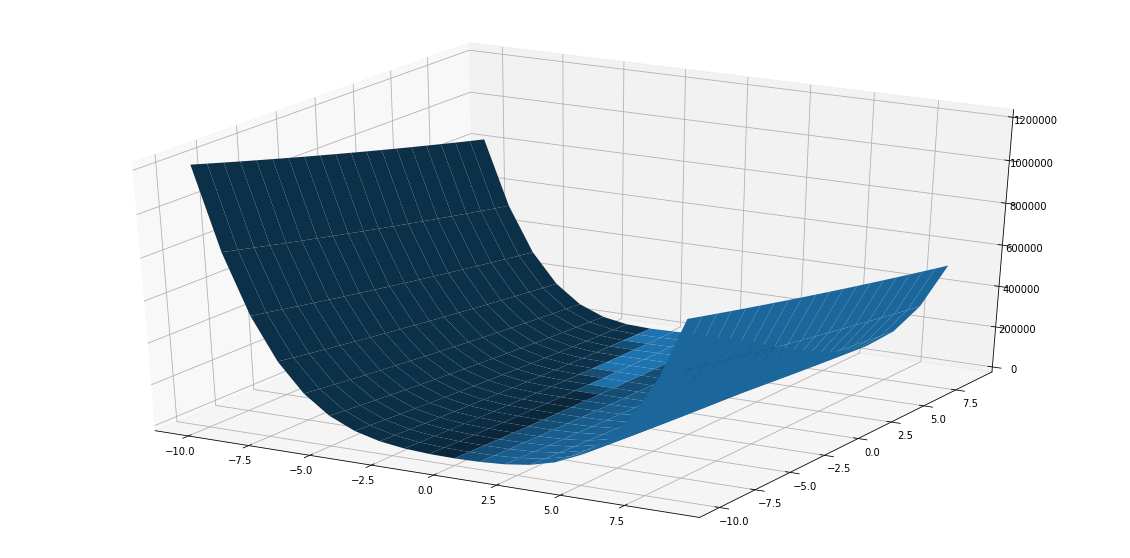

In [171]:
draw_function(x,y,f)

## Exercise 3

In [172]:
from scipy.optimize import minimize
iter_info_var = None

In [173]:
def iter_info(current_iterate,):
    global iter_info_var
    print(f'iter info {current_iterate}')
    if iter_info_var is not None:
        print(f'norm(x(k) - x(k-1): {LA.norm(current_iterate-iter_info_var)}')
    else:
        print('norm(x(k) - x(k-1): Unavailable for first iteration')
    iter_info_var = current_iterate

In [174]:
func = lambda x: x[0]**2 - x[1]**2
cons = [{'type': 'eq', 'fun': lambda x:  x[0] + 2 * x[1] + 1},{'type': 'ineq', 'fun': lambda x:  x[0] -  x[1] - 3}]

In [175]:
minimize(fun=func, x0=np.array([[100, 10]]), method='SLSQP', constraints=cons, options={"disp":True}, callback=iter_info)

iter info [ 1.66666667 -1.33333333]
norm(x(k) - x(k-1): Unavailable for first iteration
iter info [ 1.66666667 -1.33333333]
norm(x(k) - x(k-1): 0.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0000000000759615
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


     fun: 1.0000000000759615
     jac: array([3.33333337, 2.66666666])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 1.66666667, -1.33333333])